# Orientation Formula

The intuition behind the orientation formula comes from comparing the slopes of two line segments.

Given three points $p = (p_x, p_y)$, $q = (q_x, q_y)$, and $r = (r_x, r_y)$, we want to determine the direction of the turn at point $q$ when traversing the path $p \to q \to r$.

We can define two slopes:

* **Slope 1 ($\vec{pq}$):**
    $$m_1 = \frac{q_y - p_y}{q_x - p_x}$$

* **Slope 2 ($\vec{qr}$):**
    $$m_2 = \frac{r_y - q_y}{r_x - q_x}$$

The orientation is determined by comparing these two slopes:

* **CCW (Left Turn):** $m_2 > m_1$ (Slope increases)
* **Clockwise (Right Turn):** $m_2 < m_1$ (Slope decreases)
* **Collinear (No Turn):** $m_2 = m_1$ (Slopes are equal)

However, these slope formulas fail if a line segment is vertical (e.g., $q_x = p_x$), resulting in a division-by-zero error. We can test the relationship $m_2 > m_1$ using algebra to avoid this division.

1.  Start with the counter-clockwise condition $m_2 > m_1$:
    $$\frac{r_y - q_y}{r_x - q_x} > \frac{q_y - p_y}{q_x - p_x}$$

2.  Move all terms to one side to compare against zero:
    $$\frac{r_y - q_y}{r_x - q_x} - \frac{q_y - p_y}{q_x - p_x} > 0$$

3.  Combine the fractions by finding a common denominator:
    $$\frac{(r_y - q_y)(q_x - p_x) - (q_y - p_y)(r_x - q_x)}{(r_x - q_x)(q_x - p_x)} > 0$$

The sign of this entire expression depends on the sign of the numerator. Let $Z$ be this numerator:

$$Z = (q_x - p_x)(r_y - q_y) - (q_y - p_y)(r_x - q_x)$$

The sign of $Z$ gives the orientation robustly, without division:

$$
\begin{aligned}
Z > 0 & \implies \textbf{Counter-Clockwise} \\
Z < 0 & \implies \textbf{Clockwise} \\
Z = 0 & \implies \textbf{Collinear}
\end{aligned}
$$

# **Monotone Chain**

## Intuition:

### Working of the Algorithm

1. Sort the given array of vertices using in ascending order based on the x-coordinate and then the y-coordinate
2. When choosing to add a new vertex to the hull, check whether the internal angle formed by the (new_vertex, last_vertex) segment and the (last_vertex,2nd_last_vertex) is less than $ 180^{\circ} $ meaning that the new edge created by the vertex ensures the properties of a convex polygon (approximated through the dot product)   
3. If the above condition fails, we remove the previously added vertex and repeat the check till the condition is satisfied.
4. Do steps 2 and 3 for the upper hull, but iterate from the right (highest x-coordinate to lowest x-coordinate)
5. Combine the lower hull and upper hull sets to get the final answer

### Why it works

- We only ever add a vertex to the lower or upper hull based on the condition dictated in step 2 above. The condition above only is true when a previously considered vertex would end up lying inside the polygon because the if the internal angle is greater than or equal to 180 then there there must exist an edge from a previously added edge of shorter distance to the current vertex being considered, which will encompass that vertex within the polygon. Hence, by removing any vertex that results in a violation to the above condition can be removed to ensure a successful building of the hull.
- This process has to be repeated for the upper and lower hull because when iterating from the left to right any vertex that is part of the upper hull will result in an angle of greater than 180 as we cross across the polygon to try to include it and a similar thing happens with the lower hull when iterating from right to left. Hence to get the complete hull we have to build the upper and lower halves separately.
---
## Proof of Correctness

As the algorithm for both the hulls is the same, proving one of the hulls is enough to show the correctness of the computation of the other hull.

### This is a proof by induction.

**Invariant**
At any given time k, the stack S at that time contains a valid upper hull of all the points visited up until that point in the array of points for which we are finding the hull for.

**Base Case**\
A line segment created by only two points is always part of the upper convex hull. Hence S = {$p_1,p_2$} is part of the convex hull.\

**Inductive Hypothesis**\
Assume for the stack S represents the current upper hull for points ${p_1, p_2, p_3, ..., p_{k-1}}$

**Adding the $p_k$ point to the hull**

The new point $p_k$ compares itself with the last two points at the top of the hull: $p_{k-1}$ and $p_{k-2}$, hence to figure out the angle or turn of the two vectors: $[p_{k-2}, p_{k-1}]$ and $[p_{k-1}, p_{k}]$, we compute the cross product them.

- **The Cross Product is Positive**
    - This means that the new point $p_k$ is at a lower y-coordinate as opposed to the $p_{k-1}$ because the vector formed is either inline with the $[p_{k-2}, p_{k-1}]$ vector or is pointing down ward, making the internal angle made by the two vectors less than or equal to $180^{\circ}$.
    - As the inner angle of two edges in a convex shape must always be less than or equal$180^{\circ}$, we can be confident that this point $p_k$ belongs to the convex hull, hence can be added to the stack.
    - if the angle is equal to $180^{\circ}$, then we choose the farthest point which is inline to be part of our hull.

- **The Cross Product is Negative**
    - This means that the new point $p_k$ is at a larger/higher y-coordinate opposed to the $p_{k-1}$ point and not inline with the $[p_{k-2}, p_{k-1}]$ vector, making the internal angle made by the two vectors greater than $180^{\circ}$.
    - This means that the $p_{k-1}$ point which was in the $[p_{k-2}, p_{k-1}]$ and $[p_{k-1}, p_{k}]$ hull is not a valid part of the hull as the internal angle for these two edges is not greater than $180^{\circ}$. Hence it must be removed from the stack.
    - Now we repeat this process till we get a cross product which is positive of till we reach the base case, and this new point will be added.

Hence we have proven by induction that if the hull for the first k-1 points is validm introducing a new point will allow us to build the new convex hull, even though that may include the removal fo previous vertices.

**Proof that the removed vertices can never be part of the hull**\
Assume that there exits a new point $p_i$ with who a removed vertex $p_j$ makes a valid angle, and hence should make a valid entry in the hull. If this pairing is valid it must mean the cross product must be positive, and more importantly, this new point $p_i$ must be below the $p_j$ point. This means the line formed by $(p_j, p_i)$ will always be lower than the line formed by a previous point which evicted $p_j$. As this new point is always to the right of any other point we have checked before (due to the previous sorting), to connect $p_j$ to $p_i$ we must pass under the point which evicted $p_j$, ensuring the previous hull will conver this new line segment and hence cannot be part of the hull, as it is inside of it.

---

## Time Complexity Analysis

- Comparison Based Sorting: $O(n\space log \space n)$
- Lower Hull building: $O(n)$, as we loop through all the possible points once while building the lower hull.
- Upper Hull building: $O(n)$, the same reason as that of the lower hull building.
- Total Complexity: $O(n) + O(n) + O(n\space log \space n)$, as the largest term is $O(n\space log \space n)$, **$O(n\space log \space n)$** is the overall time complexity.

---
## Space Complexity Analysis

- Comparison Based Sorting (in place sorting): $O(n)$
- Lower Hull building: $O(n/2)$, one array is of maximum n/2 elements, as each hull can take up at max n/2 elements if all the vertices in the graph are on the hull.
- Upper Hull building: $O(n/2)$, same reasoning as above
- Total Hull Complexity: $O(n)$, at max can have all n vertices if all vertices are included in the hull
- Final Space complexity: **$O(n)$**

In [ ]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.graph_objects as go
import imageio
import tempfile
import os

In [ ]:
#monotone chain algorithm

def generate_random_vertices(num_points, min_val, max_val):
    vertex_list = [
        (random.randint(min_val, max_val), random.randint(min_val, max_val))
        for _ in range(num_points)
    ]
    return vertex_list

def dot_product(v1, v2, v3):

    return (v2[0] - v1[0]) * (v3[1] - v1[1]) - (v2[1] - v1[1]) * (v3[0] - v1[0])

def upper_hull_calc(vertex_list):
    upper_hull = []

    for i in range(0, len(vertex_list)):
        while len(upper_hull) >= 2 and dot_product(upper_hull[-2],upper_hull[-1],vertex_list[i]) <= 0:
            upper_hull.pop()
        upper_hull.append(vertex_list[i])

    return upper_hull


def lower_hull_calc(vertex_list):
    lower_hull = []

    for i in reversed(range(0, len(vertex_list))):
        while len(lower_hull)>=2 and dot_product(lower_hull[-2],lower_hull[-1], vertex_list[i]) <= 0:
            lower_hull.pop()
        lower_hull.append(vertex_list[i])

    return lower_hull


if __name__ == "__main__":
    # Your code
    vertex_list = generate_random_vertices(25, 0, 100)

    sorted_vertices = sorted(vertex_list, key=lambda item: item[0])
    upper_hull = upper_hull_calc(sorted_vertices)
    lower_hull = lower_hull_calc(sorted_vertices)
    convex_hull = lower_hull[:-1]+upper_hull[:-1]
    print(convex_hull)



[(84, 52), (80, 90), (76, 92), (54, 93), (3, 92), (7, 52), (11, 16), (12, 11), (23, 3), (80, 0), (84, 12)]


In [ ]:
# --- Helper Functions ---

def generate_random_vertices(num_points, min_val, max_val):
    return [(random.randint(min_val, max_val), random.randint(min_val, max_val))
            for _ in range(num_points)]

def cross_product(o, a, b):
    """
    Returns the cross product (z-component) of vectors OA and OB.
    Positive: Left Turn (Counter-Clockwise)
    Negative: Right Turn (Clockwise)
    Zero: Collinear
    """
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

# --- The Visualization Class ---

class PlotlyHullAnimator:
    def __init__(self, points):
        # Sort points by x-coordinate
        self.points = sorted(points, key=lambda p: p[0])

        # Unpack for initial static plot
        self.all_x = [p[0] for p in self.points]
        self.all_y = [p[1] for p in self.points]

        # Calculate axis ranges with padding
        pad = 10
        self.x_range = [min(self.all_x) - pad, max(self.all_x) + pad]
        self.y_range = [min(self.all_y) - pad, max(self.all_y) + pad]

    def algorithm_generator(self):
        """
        Yields the state of the algorithm at every step.
        """
        n = len(self.points)
        upper = []
        lower = []

        # --- Phase 1: Lower Hull ---
        for i, p in enumerate(self.points):
            # Must copy lists (upper[:]) because they are mutable
            yield {'hull': upper[:], 'curr': p, 'phase': 'Lower Hull', 'action': 'new_point'}

            while len(upper) >= 2:
                yield {'hull': upper[:], 'curr': p, 'check_pts': (upper[-2], upper[-1], p),
                       'phase': 'Lower Hull', 'action': 'checking'}

                val = cross_product(upper[-2], upper[-1], p)

                if val <= 0:
                    yield {'hull': upper[:], 'curr': p, 'bad': upper[-1], 'phase': 'Lower Hull', 'action': 'popping'}
                    upper.pop()
                else:
                    break

            upper.append(p)
            yield {'hull': upper[:], 'curr': p, 'phase': 'Lower Hull', 'action': 'added'}

        # --- Phase 2: Upper Hull ---
        for i in reversed(range(n)):
            p = self.points[i]
            yield {'hull': (upper + lower)[:], 'curr': p, 'phase': 'Upper Hull', 'action': 'new_point'}

            while len(lower) >= 2:
                yield {'hull': (upper + lower)[:], 'curr': p, 'check_pts': (lower[-2], lower[-1], p),
                       'phase': 'Upper Hull', 'action': 'checking'}

                val = cross_product(lower[-2], lower[-1], p)

                if val <= 0:
                    yield {'hull': (upper + lower)[:], 'curr': p, 'bad': lower[-1], 'phase': 'Upper Hull', 'action': 'popping'}
                    lower.pop()
                else:
                    break

            lower.append(p)
            yield {'hull': (upper + lower)[:], 'curr': p, 'phase': 'Upper Hull', 'action': 'added'}

        # Final State
        full_hull = upper[:-1] + lower[:-1]
        full_hull.append(full_hull[0]) # Close the loop
        yield {'hull': full_hull, 'curr': None, 'phase': 'Finished', 'action': 'done'}

    def create_animation(self):
        frames = []

        # Iterate through the generator and build frames
        for step in self.algorithm_generator():

            # 1. Prepare Data for this Frame

            # Hull Line Data
            hull_x, hull_y = [], []
            if step['hull']:
                hull_x, hull_y = zip(*step['hull'])

            # Current Point Data
            curr_x, curr_y = [], []
            if step['curr']:
                curr_x, curr_y = [step['curr'][0]], [step['curr'][1]]

            # Test Line Data (Red dashed)
            test_x, test_y = [], []
            if step.get('check_pts'):
                pts = step['check_pts']
                test_x = [pts[0][0], pts[1][0], pts[2][0]]
                test_y = [pts[0][1], pts[1][1], pts[2][1]]

            # Bad Point Data (Red X)
            bad_x, bad_y = [], []
            if step.get('bad'):
                bad_x, bad_y = [step['bad'][0]], [step['bad'][1]]

            # Status Text
            action_map = {
                'new_point': "Next point...",
                'checking': "Checking Angle (Cross Product)",
                'popping': "Right Turn -> Pop Vertex (Concave)",
                'added': "Left Turn -> Valid (Convex)",
                'done': "Algorithm Complete"
            }
            status_msg = f"<b>{step['phase']}</b><br>{action_map.get(step['action'], '')}"

            # 2. Construct the Frame
            # We must provide data for ALL traces in the exact order they are added to the figure
            frames.append(go.Frame(
                data=[
                    go.Scatter(x=self.all_x, y=self.all_y), # Trace 0: Static Points (Data doesn't change)
                    go.Scatter(x=hull_x, y=hull_y),         # Trace 1: Hull
                    go.Scatter(x=test_x, y=test_y),         # Trace 2: Test Line
                    go.Scatter(x=curr_x, y=curr_y),         # Trace 3: Current Point
                    go.Scatter(x=bad_x, y=bad_y)            # Trace 4: Bad Point
                ],
                layout=go.Layout(
                    annotations=[dict(
                        x=0.02, y=0.98, xref="paper", yref="paper",
                        text=status_msg, showarrow=False, align="left", font=dict(size=14)
                    )]
                )
            ))

        # 3. Create the Initial Figure
        fig = go.Figure(
            data=[
                # Trace 0: Static Points
                go.Scatter(x=self.all_x, y=self.all_y, mode='markers', marker=dict(color='lightgray', size=10), name='Points'),
                # Trace 1: Hull Line
                go.Scatter(x=[], y=[], mode='lines+markers', line=dict(color='blue', width=3), name='Hull'),
                # Trace 2: Test Line
                go.Scatter(x=[], y=[], mode='lines', line=dict(color='red', width=2, dash='dash'), name='Test Edge'),
                # Trace 3: Current Point
                go.Scatter(x=[], y=[], mode='markers', marker=dict(color='green', size=12), name='Current'),
                # Trace 4: Bad Point
                go.Scatter(x=[], y=[], mode='markers', marker=dict(color='red', size=12, symbol='x'), name='Popped')
            ],
            layout=go.Layout(
                xaxis=dict(range=self.x_range, autorange=False),
                yaxis=dict(range=self.y_range, autorange=False),
                title="Monotone Chain Algorithm Animation",
                updatemenus=[dict(
                    type="buttons",
                    showactive=False,
                    buttons=[dict(
                        label="Play",
                        method="animate",
                        args=[None, dict(frame=dict(duration=800, redraw=True), fromcurrent=True)]
                    ),
                    dict(
                        label="Pause",
                        method="animate",
                        args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate", transition=dict(duration=0))]
                    )]
                )]
            ),
            frames=frames
        )

        return fig

# --- Main Execution ---
if __name__ == "__main__":
    # 1. Generate Data
    vertex_list = generate_random_vertices(20, 10, 90)

    # 2. Create Animator
    animator = PlotlyHullAnimator(vertex_list)

    # 3. Build and Show Figure
    fig = animator.create_animation()
    fig.show()


# **Quick-Hull**

## The Algorithm

Given, we have a set $S$ of n points in the plane. The quickhull algorithm is a divide and conquer algorithm which works as follows:
 - Pick two points $p$ and $r$ which have the minimum $x$-coordinate and maximum $x$-coordinate respectively.
 - Now, from our given set of points $S$, the line $\overline{pr}$ has sectioned the set $S$ into two; we have all the points above $\overline{pr}$ ($S_{\text{upper}}$) and all the points below $\overline{pr}$ ($S_{\text{lower}}$). Each of these forms a subproblem, where we have to construct the upper hull from the points in $S_{\text{upper}}$ and the lower hull from the points in $S_{\text{lower}}$. Let us consider the construction of the upper hull.
 - We find the point $q$ such that the perpendicular distance of $q$ from the line $\overline{pr}$ is maximum. Then, $q$ must be part of the convex hull. This divides $S_{\text{upper}}$ into 3 parts:
    1. The points to the left of (or above) $\overline{pq}$ ($S_1$).
    2. The points in the triangle formed by joining $p$, $q$ and $r$ ($S_2$).
    3. The points to the right of (or below) $\overline{qr}$ ($S_3$).
 - Thus this creates two more subproblems:
    1. The problem consisting of points $S_1$ with base $\overline{pq}$.
    2. The problem consisting of points $S_3$ with base $\overline{qr}$.
 - Here, the points in $S_2$ can not be part of the convex hull.
 - We do the same thing for $S_{\text{lower}}$.

## Animation

In [ ]:
# /// script
# dependencies = [
#   "plotly",
# ]
# ///
import random
import plotly.graph_objects as go
import numpy as np

# Global storage
frames = []
confirmed_hull_points = set()

def generate_points(n=20, min_val=0, max_val=10):
    """
    Generates a list of 'n' random (x, y) tuples.
    """
    return [
        (round(random.uniform(min_val, max_val), 2),  # X coordinate
         round(random.uniform(min_val, max_val), 2))  # Y coordinate
        for _ in range(n)
    ]

def cross_product(o, a, b):
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

def make_frame(all_pts, p1, p2, subset, c=None, title=""):
    """Helper to create a Plotly Frame with stable IDs"""

    # 1. Background Points
    # We assign IDs so Plotly knows which dot is which
    trace_all = go.Scatter(
        x=[p[0] for p in all_pts],
        y=[p[1] for p in all_pts],
        ids=[str(p) for p in all_pts], # <--- STOPS THE CYCLING
        mode='markers',
        marker=dict(color='lightgrey', size=8),
        name='All Points'
    )

    # 2. Confirmed Points
    # Sort them to minimize list-order jitter, plus use IDs
    confirmed_list = sorted(list(confirmed_hull_points))
    trace_confirmed = go.Scatter(
        x=[p[0] for p in confirmed_list],
        y=[p[1] for p in confirmed_list],
        ids=[str(p) for p in confirmed_list], # <--- STOPS THE CYCLING
        mode='markers',
        marker=dict(color='green', size=12, line=dict(width=2, color='darkgreen')),
        name='Confirmed Hull Points'
    )

    # 3. Base Line
    line_x, line_y = [], []
    if p1 and p2:
        line_x = [p1[0], p2[0]]
        line_y = [p1[1], p2[1]]

    trace_line = go.Scatter(
        x=line_x, y=line_y,
        mode='lines+markers',
        line=dict(color='blue', width=2, dash='dash'),
        marker=dict(color='blue', size=8),
        name='Current Base Line'
    )

    # 4. Active Subset
    sub_x = [p[0] for p in subset]
    sub_y = [p[1] for p in subset]
    trace_subset = go.Scatter(
        x=sub_x, y=sub_y,
        ids=[str(p) for p in subset], # <--- STOPS THE CYCLING
        mode='markers',
        marker=dict(color='orange', size=10, opacity=0.7),
        name='Active Subset'
    )

    # 5. New Point C
    c_x, c_y = [], []
    if c and p1 and p2:
        c_x = [p1[0], c[0], p2[0]]
        c_y = [p1[1], c[1], p2[1]]

    trace_c = go.Scatter(
        x=c_x, y=c_y,
        mode='lines+markers',
        line=dict(color='red', width=2),
        marker=dict(color='red', size=14, symbol='star'),
        name='New Point (c)'
    )

    return go.Frame(
        data=[trace_all, trace_confirmed, trace_line, trace_subset, trace_c],
        layout=go.Layout(title=title)
    )

def quickhull_viz(points, all_pts, p1=None, p2=None):

    if p1 is None and p2 is None:
        if len(points) <= 2: return points

        # Sort a COPY so we don't mutate the global 'all_pts' order accidentally
        sorted_pts = sorted(points)
        p_min = sorted_pts[0]
        p_max = sorted_pts[-1]

        confirmed_hull_points.add(p_min)
        confirmed_hull_points.add(p_max)

        frames.append(make_frame(all_pts, p_min, p_max, sorted_pts,
                                 title="Start: Min and Max identified (Green)"))

        upper_hull = quickhull_viz(sorted_pts, all_pts, p_min, p_max)
        lower_hull = quickhull_viz(sorted_pts, all_pts, p_max, p_min)

        return [p_min] + upper_hull + [p_max] + lower_hull

    # --- RECURSIVE STEP ---
    subset = [p for p in points if cross_product(p1, p2, p) > 0]

    frames.append(make_frame(all_pts, p1, p2, subset,
                             title=f"Checking subset left of {p1}->{p2}"))

    if not subset:
        return []

    c = max(subset, key=lambda p: abs(cross_product(p1, p2, p)))

    confirmed_hull_points.add(c)

    frames.append(make_frame(all_pts, p1, p2, subset, c,
                             title=f"Found farthest point {c} -> Confirmed"))

    return quickhull_viz(subset, all_pts, p1, c) + [c] + quickhull_viz(subset, all_pts, c, p2)

# --- EXECUTION ---

# pts = [(0, 3), (1, 1), (2, 2), (4, 4), (0, 0), (1, 2), (3, 1), (3, 3),
#        (2, 0), (4, 1), (1, 4), (0.5, 2.5), (3.5, 3.5)]

pts = generate_points(n=30, min_val=0, max_val=10)

# Run Algorithm
# Pass a copy of pts to avoid any modification of original list
result_hull = quickhull_viz(pts[:], pts)

# Final Frame construction
final_x = [p[0] for p in result_hull] + [result_hull[0][0]]
final_y = [p[1] for p in result_hull] + [result_hull[0][1]]

final_trace = go.Scatter(
    x=final_x, y=final_y,
    mode='lines+markers',
    fill='toself',
    line=dict(color='green', width=3),
    marker=dict(size=10, color='green'),
    name='Final Hull'
)

frames.append(go.Frame(
    data=[
        go.Scatter(x=[p[0] for p in pts], y=[p[1] for p in pts], mode='markers', marker=dict(color='lightgrey', size=8)),
        go.Scatter(x=[], y=[]),
        go.Scatter(x=[], y=[]),
        go.Scatter(x=[], y=[]),
        final_trace
    ],
    layout=go.Layout(title="Convex Hull Complete")
))

fig = go.Figure(
    data=frames[0].data,
    layout=go.Layout(
        title="Quickhull Animation (Stable)",
        xaxis=dict(range=[-1, 5], constrain='domain'),
        yaxis=dict(range=[-1, 5], scaleanchor="x"),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)])]
        )]
    ),
    frames=frames
)

fig.show()


## Implementation

In [ ]:
def quickhull(points, p1=None, p2=None):

    if p1 is None and p2 is None:
        if len(points) <= 2: return points
        p_min = min(points)
        p_max = max(points)
        upper_hull = quickhull(points, p_min, p_max)
        lower_hull = quickhull(points, p_max, p_min)
        return [p_min] + upper_hull + [p_max] + lower_hull

    subset = [p for p in points if cross_product(p1, p2, p) > 0]

    if not subset:
        return []

    c = max(subset, key=lambda p: abs(cross_product(p1, p2, p)))
    return quickhull(subset, p1, c) + [c] + quickhull(subset, c, p2)

def cross_product(o, a, b):
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

pts = [(0, 3), (1, 1), (2, 2), (4, 4), (0, 0), (1, 2), (3, 1), (3, 3)]
print(quickhull(pts))

[(0, 0), (0, 3), (4, 4), (3, 1)]


## Proofs Of Correctness

**Lemma 1:** Points with minimum and maximum $x$ coordinates are part of the convex hull.\
**Proof**:\
Let's call both points with min-$x$ coordinate and max-$x$ coordinate $A$ and $B$ respectively.\
Here, we do a **Proof by Contradiction**.\
Suppose $A$ and $B$ are not part of the convex hull. Then, there exists a point $C$ such that the $x$-coordinate of $C$ is
between the $x$-coordinates of $A$ and $B$, and $C$ is on the convex hull, and the x-coordinate of $C$ is the least of all points on the convex hull.\
Then, the line segment $\overline{AC}$ is not convex; it will not lie inside the convex hull (since the boundary of the convex hull stopped at $C$).\
Similarly, there exists a $D$ such that $D$ has the maximum x-coordinate of all points on the convex hull. Consider the line segment $\overline{BD}$.\
$\overline{BD}$ is not convex; it does not lie inside the convex hull (since the boundary stopped at $D$). Hence, our assumption is wrong; $A$ and $B$ must belong to the convex hull.\

**Lemma 2**: Given 2 points $A$ and $B$ which are known to be on the hull, and if we have a point $C$ on one side of the line
whose distance from $\overline{AB}$ is the maximum for all such $C$, then that specific $C$ is also on the convex hull.

**Proof**:\
Construct a line parallel to $\overline{AB}$ passing through $C$. All points that are on the same side of $\overline{AB}$ as
$C$ lie between (or on) $\overline{AB}$ and the line passing through $C$ (since $C$ is the furthest).\
Because $C$ is the furthest point from $\overline{AB}$, there is no point that lies beyond $C$; i.e. every point lies on
one side of the line passing through $C$. Hence, the line passing through $C$ is a **tangent** to the convex hull. Since
$C$ is on this tangent, $C$ is also on the convex hull (if the tangent passed through a point inside the convex hull, then
that's a contradiction; the line would not be a tangent as there would be some points which lie to the other side of the line).

Using lemma 1 and lemma 2, we can do the **Proof of Correctness for Quickhull**.\
**Proof**:\
We start the algorithm by using lemma 1; we find points with minimum and maximum $x$-coordinate $p$ and $r$, which we know lie on the convex hull.\
Then from lemma 2, we find a point $q$ which is at maximum distance from $\overline{pr}$, and this $r$ must lie on the convex hull. We recursively find all points using lemma 2, until there are no more points to find; as an example, the sub-problems created are the problem with base $\overline{pq}$ and the problem with base $\overline{qr}$.

## Complexities

### Time Complexity

The average runtime for the algorithm is $O(n\log{n})$.\
The worst-case runtime for the algorithm is $O(n^2)$.\
**Proof**:\
Looking at the algorithm, finding the min x-coordinate and max x-coordinate point takes $O(n)$ time; it's a linear search.\
For the recursion, we split the points into partitions. Let's call the partitions $A$ and $B$. The cost of the recursion is dependent on the sizes of the partitions:\
**Best Case**: $|A|$ = $|B|$ (the partition sizes are equal).\
The recurrence relation turns out to be

$$T(n) = 2T(\frac{n}{2}) + O(n)$$

whose solution turns out to be

$$T(n) = O(n\log{n})$$


**Worst Case**: When the partition is extremely unbalanced; i.e. $|A| >> |B|$ or $|A| << |B|$.\
In this case, the recurrence relation turns out to be

$$ T(n) = T(n - 1) + O(n)$$

Repeated expansion of this gives us the solution

$$ T(n) = O(n^2) $$

So, the best case run-time of Quickhull is $O(n\log{n})$, while the worst case run-time of Quickhull is $O(n^2)$.


### Space Complexity

The algorithm takes $O(n)$ space, as the only memory that we are using is the input array, and the output array (which is bounded by $n$).

# **Randomized Quick-Hull (Ray-Shooting)**

## The Algorithm

We are given a set, $S$, of n points in the plane.
The ray-shooting Quickhull algorithm begins exactly the same as the normal Quickhull algorithm.

That is, it starts with finding the points p, r $\in S$ such that $p$ has the minimum $x$-coordinate, and r has the maximum $x$ coordinate. Here, clearly $p$ and $r$ are part of the convex hull (they have the minimum and maximum $x$-coordinate).

Similar to the normal Quickhull algorithm, Ray-Shooting Quickhull is also a divide-and-conquer algorithm.

So, here the two sub-problems created is forming the hull for the points above the line segment $\overline{pr}$, and for the points below the point $\overline{pr}$.

Let us consider the subproblem of creating the hull for the points above $\overline{pr}$. We start by randomly picking a point from $S'$, where $S'$ is the set of all the points above the line $\overline{pr}$. Let us say the random point we picked is some $q$. Here, $q$ does not necessarily need to be on the boundary of the convex hull; it could be a point that would be inside the actual convex hull as well.

We view $q$ as a pivot. We perform a **ray-shooting query** from q, which will be directed in the direction perpendicular to $\overline{pr}$. Let's call this perpendicular ray $R$. Now, our goal is to find points $s$ and $t$ such that $\overline{st}$ is an edge of the convex hull and it crosses the 'ray' $R$ shot from $q$ (if $s$ and $t$ turn out to be the same point, we view $\overline{st}$ as an edge of the convex hull with length 0).


### Ray Shooting Query

 - Initialize both $t$ and $s$ to be $q$.
 - We initialize two sets, $S'_l$ and $S'_r$ to be $\{q\}$. The goal of each of these sets is to contain all the points to the left and right of $R$ that have been processed so far.
 - We iterate over all points in $S'$. Let's say the current point being considered is $a_i$.
  - First, we check the **relative position** of $a_i$ with $\overline{st}$. We do so by considering the **cross product** of vectors $\vec{sa_i}$ and $\vec{st}$.
 - If $\vec{st}$ $\times$ $\vec{sa_i}$ turns out to be **negative**, then we ignore that $a_i$, since it is a point that is below the current $\overline{st}$.
 - If $\vec{st}$ $\times$ $\vec{sa_i}$ turns out to be **positive**, then that means that the point $a_i$ is on the right (above) the line, else it is to the left (below) the line. Since we want to find the highest possible point (a point that is on the convex hull) we want an $a_i$ which is to the right (above) the current $\overline{st}$.
 - Now we have a point which is above our current $\overline{st}$, which means our selection of $s$ and $t$ is not optimal; it does not cover all the points.
 - Depending on whether $a_i$ is to the left of $R$ or the right, we update $s$ or $t$ to be $a_i$ respectively. Without loss of generality, let us say we updated $s$; i.e. $s$ = $a_i$.
 -  Then, we loop through all points $t'$ in $S'_r$ (the set of all points to the right of the ray that have been processed so far) such that $t'$ is to the left (or above) the **current** $\overline{st}$. We want to pick a $t'$ that is better than the current $t$ we have. One may think this is unnecessary, however the previous $t$ we had may not always be the best currently; Consider figure 1 and figure 2.

 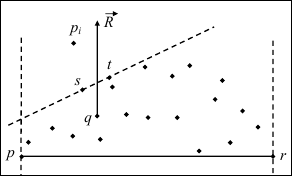

 - Here, we $p_i$ is our $a_i$ that has been randomly picked. Since $p_i$ is above the current $\overline{st}$, it is a better pick. Also since it is to the left of $R$, we will update $s$ to be $p_i$. However, on picking that $p_i$ to be $s$, there is also a better $t'$ that can be picked:

 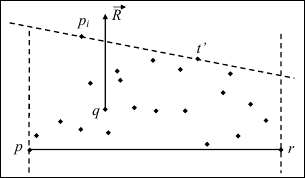

 - As we iterate over all points in $S'$, eventually we will have an $s$ and $t$ such that $\overline{st}$ is part of the convex hull; so we have created two subproblems, where one 'base' would be $\overline{ps}$ and the other would be $\overline{tr}$.

This forms a 'trapezium-like structure'. Since all the points inside this structure are already covered by $p$, $s$, $r$ and $t$, we can ignore these points. Doing this recursion gives us the convex hull, edge-by-edge.

## Implementation

In [ ]:
import random
import math
import numpy as np # Needed for the test cases

def orientation(p1, p2, point) -> float:
    return (p2[0] - p1[0]) * (point[1] - p1[1]) - (p2[1] - p1[1]) * (point[0] - p1[0])

def ray_shoot_bridge(S, p, r, q):
    s = t = q
    base_cp = orientation(p, r, q)

    Sl = []
    Sr = []

    S_shuffled = S

    Sl.append(q)
    Sr.append(q)

    vec_pr = (r[0]-p[0], r[1]-p[1])
    vec_pq = (q[0]-p[0], q[1]-p[1])
    proj_q = vec_pq[0]*vec_pr[0] + vec_pq[1]*vec_pr[1]

    for point in S_shuffled:
        vec_ppoint = (point[0]-p[0], point[1]-p[1])
        proj_point = vec_ppoint[0]*vec_pr[0] + vec_ppoint[1]*vec_pr[1]

        is_left = proj_point < proj_q
        is_right = proj_point > proj_q
        is_above_bridge = False

        if s is t:
            # Check relative to the baseline pr
            point_cp = orientation(p, r, point)
            if point_cp > base_cp:
                is_above_bridge = True
        else:
            # Check relative to the current bridge st
            if orientation(s, t, point) > 0:
                is_above_bridge = True

        if is_above_bridge:
            if is_left:
                s = point
                # Scan Sr for best t
                if Sr:
                    best_t = Sr[0]
                    for candidate in Sr[1:]:
                        if orientation(s, best_t, candidate) > 0:
                            best_t = candidate
                    t = best_t

            elif is_right:
                t = point
                # Scan Sl for best s
                if Sl:
                    best_s = Sl[0]
                    for candidate in Sl[1:]:
                        if orientation(best_s, t, candidate) > 0:
                            best_s = candidate
                    s = best_s

        if is_left:
            Sl.append(point)
        elif is_right:
            Sr.append(point)

    return s, t

def find_hull(p, r, S):
    if not S:
        return []

    q = random.choice(S)
    s, t = ray_shoot_bridge(S, p, r, q)

    S1 = []
    S2 = []
    for pt in S:
        # Check if point is outside (above) ps
        if orientation(p, s, pt) > 0:
            S1.append(pt)
        # Check if point is outside (above) tr
        elif orientation(t, r, pt) > 0: # Using elif is safe for convex sets usually, but separate checks are robust
            S2.append(pt)

    # Note: A point cannot be outside BOTH ps and tr if s, t are on the hull logic,
    # but separate 'if's are safer if overlaps are possible.
    # Logic kept as user provided (sequential checks).

    left  = find_hull(p, s, S1)
    right = find_hull(t, r, S2)

    if s[0] == t[0] and s[1] == t[1]:
        return left + [s] + right
    else:
        return left + [s, t] + right

def ray_shooting_quickhull(points):
    if isinstance(points, np.ndarray):
        points = points.tolist()

    if len(points) < 3:
        return points

    p_min = min(points, key=lambda p: (p[0], p[1]))
    p_max = max(points, key=lambda p: (p[0], p[1]))

    upper = []
    lower = []

    for pt in points:
        orient = orientation(p_min, p_max, pt)
        if  orient > 0:
            upper.append(pt)
        elif orient < 0:
            lower.append(pt)

    hull = [p_min]
    hull += find_hull(p_min, p_max, upper)
    hull.append(p_max)
    hull += find_hull(p_max, p_min, lower)
    return hull


# === Simple test ===
if __name__ == "__main__":
    test_cases = [
        ("Simple triangle", np.array([[0,0], [4,0], [2,3]])),
        ("Square with internal point", np.array([[0,0], [4,0], [4,4], [0,4], [2,2]])),
        ("Original test", np.array([[0,0], [4,0], [2,3], [2,1], [1,1], [3,1]])),
        ("Pentagon", np.array([[0,0], [2,0], [3,2], [1,3], [-1,1]])),
        ("All points on hull", np.array([[0,0], [1,0], [2,1], [1,2], [0,1]])),
        ("Collinear points on edge", np.array([[0,0], [4,0], [2,4], [1,0], [2,0], [3,0]])),
        ("Many internal points", np.array([[0,0], [10,0], [10,10], [0,10],
                                           [2,2], [3,3], [4,4], [5,5], [6,6], [7,7]])),
        ("Narrow triangle", np.array([[0,0], [10,0], [5,1], [5,0.5]])),
        ("Random scattered", np.array([[1,1], [3,2], [2,4], [5,3], [4,1], [2,2], [3,3]])),
        ("Parabola points", np.array([[0,0], [1,1], [2,4], [4,16], [8,64]])),
    ]

    for name, pts in test_cases:
        print(f"\n{'='*50}")
        print(f"Test: {name}")
        print(f"{'='*50}")
        print(f"Input points: {len(pts)} points")

        hull = ray_shooting_quickhull(pts)

        print(f"Hull has {len(hull)} vertices:")
        for p in hull:
            print(f"  ({p[0]}, {p[1]})")



Test: Simple triangle
Input points: 3 points
Hull has 3 vertices:
  (0, 0)
  (2, 3)
  (4, 0)

Test: Square with internal point
Input points: 5 points
Hull has 4 vertices:
  (0, 0)
  (0, 4)
  (4, 4)
  (4, 0)

Test: Original test
Input points: 6 points
Hull has 3 vertices:
  (0, 0)
  (2, 3)
  (4, 0)

Test: Pentagon
Input points: 5 points
Hull has 5 vertices:
  (-1, 1)
  (1, 3)
  (3, 2)
  (2, 0)
  (0, 0)

Test: All points on hull
Input points: 5 points
Hull has 5 vertices:
  (0, 0)
  (0, 1)
  (1, 2)
  (2, 1)
  (1, 0)

Test: Collinear points on edge
Input points: 6 points
Hull has 3 vertices:
  (0, 0)
  (2, 4)
  (4, 0)

Test: Many internal points
Input points: 10 points
Hull has 4 vertices:
  (0, 0)
  (0, 10)
  (10, 10)
  (10, 0)

Test: Narrow triangle
Input points: 4 points
Hull has 3 vertices:
  (0.0, 0.0)
  (5.0, 1.0)
  (10.0, 0.0)

Test: Random scattered
Input points: 7 points
Hull has 4 vertices:
  (1, 1)
  (2, 4)
  (5, 3)
  (4, 1)

Test: Parabola points
Input points: 5 points
Hull h

## Proof Of Correctness (Ray-Shooting)

Below, we prove that the 'Ray-Shooting' algorithm is correct; that is, the algorithm correctly returns $s$ and $t$ such that $\overline{st}$ is an edge of the upper hull intersected by the ray $R$ shot from $q$.

**Proof:**
This is a **Proof by Induction**.\
**Induction Hypothesis**: $\overline{st}$ is an edge of the upper hull of $\{q, a_1, a_2, \ldots, a_i\}$ that intersects the ray $R$ shot from $q$.\
**Base Case**: This is true for $i = 0$, since we begin with $s = t = q$.\
**Inductive Step**: Assume the hypothesis is true for the $(i - 1)^{\text{th}}$ iteration; we have to prove that it is true for the $i^{\text{th}}$ iteration.

We have the following cases of the next point $a_i$:
 1. $a_i$ is to the right of (or below) the current $\overline{st}$: in this case, $a_i$ is below the boundary, and inside the convex hull. Therefore it cannot change the boundary.

 2. $a_i$ is to the left of (or above) the current $\overline{st}$: in this case, $a_i$ is above the boundary. Then, without loss of generality, let us say that $a_i$ is to the left of (or above) the ray R. Then, we update $s$ to $a_i$. We need to find a $t'$ in the set of points that have been processed to the right (or below) the ray $R$ such that $\overline{st'}$ is a **tangent** of the convex hull formed by the points in $Q$ = $\{q, a_1, a_2, \ldots, a_{i-1}\}$ (here, a line is tangent to a polygon if all points of the polygon lie on one side of the line). From the induction hypothesis, we know that none of the points in $Q$ are above $\overline{st}$. Since the original $t$ is also considered while finding the suitable $t'$ ($t$ is in the set of all processes that are processed and to the right or below of $R$), none of the points in $Q$ can be above $\overline{st'}$ either.


## Complexities

### Time Complexity


We use **Strong Induction** for this proof.\
Let $T(n, h)$ be the expected runtime of the algorithm when we have $n$ input points, and $h$ of those points are on the convex hull.\
**Induction Hypothesis:** there exists a $d \geq 1$ such that $T(n, h) \leq dn$ for $n \geq 2$ and $h = 1, 2$, and $T(n, h) \leq dn\log{h}$ otherwise. We assume that the given inequality holds for all input sizes less than $n$.
**Base Case:** $T(0, h) = 0$ and $T(1, h) = 0$.\
Also, $h \leq n$.
Since the problem is randomized, we can say that the expected value of the time taken over all possible pivots is represented by the summation term, while $cn$ represents the cost of the current step.

$$
T(n, h) \le cn + \frac{1}{n} \sum_{i=0}^{n-1} \max_{h_1+h_2=h} \{ T(i, h_1) + T(n-i-1, h_2) \}
$$

We can say this as we know that for some value of $X$,\
$$
\mathbb{E}[X] = \sum_{i} x_i p_i
$$
where $p_i$ is the probability that $X$ takes the value $x_i$ - here, the probability of each pivot being picked is equal (each is $\frac{1}{n}$). Here, our $X$ is the time taken by each of the two sub-problems that our original problem is broken down into.\
We have the $\max$ term there, to take the worst possible distribution of $h_1$ and $h_2$ that would maximize the time taken to solve the sub-problems, to give an accurate upper-bound runtime to the problem.\

From the inductive hypothesis, we can reduce the recurrence to:

$$
T(n, h) \le cn + \frac{1}{n} \left( 2d(n-1)\log(h-1) + \sum_{i=1}^{n-2} \max_{h_1+h_2=h} \{ di \log h_1 + d(n-i-1) \log h_2 \} \right)
$$

where the cases of $i = 0$ and $i = n - 1$ have been handled separately, since $T(0, h_1) = 0$, and that implies $h_1 = 0$, which means $h_2 = h$, which means for that iteration the sum of the time taken by each sub-problem comes out to be $T(n - 1, h)$. This happens in both cases; hence the factor of $2$.

Now, we can find $h_1$ and $h_2$ for the $\max$ term by maximizing the following (we can ignore the factor of $d$ while finding such a $h_1$ and $h_2$):\
$$
f(h_1) = i \ln(h_1) + (n - i - 1) \ln(h - h_1)
$$

We can find the maximum by taking the derivative and setting it to 0:


$$
\frac{d}{dh_1} f(h_1) = \frac{i}{h_1} - \frac{n - i - 1}{h - h_1} = 0
$$

Solving for $h_1$ Rearranging the terms and solving algebraically:


$$
\frac{i}{h_1} = \frac{n - i - 1}{h - h_1}
$$

$$
i(h - h_1) = h_1(n - i - 1)
$$

$$
ih - i h_1 = h_1 n - h_1 i - h_1
$$

$$
ih = h_1 n - h_1 \quad
$$

$$
ih = h_1(n - 1)
$$
which finally gives us:

$$
h_1 = \frac{i}{n - 1} h
$$

For large $n$, we approximate $n-1$ to $n$, which leads to
$$ h_1 \approx \frac{i}{n} h \quad \text{and} \quad h_2 \approx \frac{n - i}{n}h
$$
So, we've found that the term inside the sum is maximized when the hull vertices are distributed proportionally to the input points (i.e., $h_1 = ih/n$). Substituting $h_1 = ih/n$ and $h_2 = (n-i-1)h/n$:
$$
\begin{aligned} T(n, h) &\le cn + \frac{d}{n} \left( 2(n-1)\log(h-1) + \sum_{i=2}^{n-2} \left( i \log \frac{ih}{n} + (n-i-1) \log \frac{(n-i-1)h}{n} \right) \right) \\ &\le cn + \frac{2d}{n} \sum_{i=1}^{n-1} i \log \frac{ih}{n} \end{aligned}
$$
We expand $\log(ih/n)$ into $\log i + \log h - \log n$ and distribute the summation:

$$
\begin{aligned} T(n, h) &= cn + \frac{2d}{n} \sum_{i=1}^{n-1} i (\log i + \log h - \log n) \\ &= cn + \frac{2d}{n} \sum_{i=1}^{n-1} i \log i + \frac{2d}{n} (\log h) \sum_{i=1}^{n-1} i - \frac{2d}{n} (\log n) \sum_{i=1}^{n-1} i \end{aligned}
$$

Now, we prove that we can say $\sum_{i=1}^{n-1} i \log i \leq \int_{1}^{n} x \log x \ dx$.

Define $f(x)$ = $x\ln x$. $f(x)$ is strictly increasing for $x \geq 1$. Since it is strictly increasing, then consider the interval $[i, i+1]$. For any $x \in [i, i+1]$, the value of $f(x)$ is at least $f(i)$.
$$
f(i) \leq f(x) \ \text{for} \ x \in [i, i+1]
$$\
Integrating both sides from $i$ to $i+1$:
$$
\int_{i}^{i+1} i \log i \, dx \le \int_{i}^{i+1} x \log x \, dx
$$
Since $i \log i$ is constant with respect to $x$, the left side becomes:
$$
i \log i \cdot (i+1 - i) = i \log i
$$
Therefore:
$$
i \log i \le \int_{i}^{i+1} x \log x \, dx
$$
Summing this inequality for all terms from $i=1$ to $n-1$:
$$
\sum_{i=1}^{n-1} i \log i \le \sum_{i=1}^{n-1} \int_{i}^{i+1} x \log x \, dx
$$
The sum of integrals over adjacent intervals equals the integral over the total range $[1, n]$:
$$
\sum_{i=1}^{n-1} i \log i \le \int_{1}^{n} x \log x \, dx
$$
We can use the integral to approximate the summation, through which we get:
$$
\sum_{i=1}^{n-1} i \log i \le \int_{1}^{n} x \log x \, dx \le \frac{n^2}{2} \log n - \frac{n^2}{4} + \frac{1}{4}
$$
Also, we know
$$
\sum_{i=1}^{n-1} i = \frac{n(n-1)}{2} \approx \frac{n^2}{2}
$$

Substituting these back into the equation:
$$
\begin{aligned} T(n, h) &\le cn + \frac{2d}{n} \left( \frac{n^2}{2} \log n - \frac{n^2}{4} \right) + \frac{2d}{n} (\log h) \frac{n^2}{2} - \frac{2d}{n} (\log n) \frac{n^2}{2} \\ \\ &= cn + (dn \log n - \frac{dn}{2}) + dn \log h - dn \log n \end{aligned}
$$
The $dn\log n$ cancels out, which gives us:
$$
\begin{aligned} T(n, h) &\le cn - \frac{dn}{2} + dn \log h \\ &\le dn \log h \quad \text{(provided } d \ge 2c \text{)} \end{aligned}
$$

**Conclusion:** The **expected** running time is $O(n \log h)$.

# Jarvis March

## The Algorithm

The Jarvis March is an algorithm used to find the convex hull of a set of points in a 2-D plane.
Note that this is a greedy algorithm. Here is a gist of the algorithm.

### 1) Find a Starting Point:
Begin by finding a point you know is on the hull. The easiest one to find is the leftmost point (the one with the smallest $x$-coordinate). This is the first point in the hull.

### 2) "Wrap" to the Next Point:
Now we need to find the next point to add to the hull. From the current point (which is initialized to the first point in the hull), we analyze every other point in the set. We do this by checking the orientation of 3 points — the current point, next point, and potential next point.

* If these points are in an **anti-clockwise** orientation, then potential next point becomes the next point.
* If they are **colinear**, and the potential next point is further from the current point than the next point, then the potential next point becomes the next point.
* In other cases, skip the potential next point.

By the end of the iteration, we find the best "next point". Add this point to the hull.

### 3) Repeat the Process:
Now, after the iteration, next point becomes current point. Now we repeat step 2. This is what makes the algorithm greedy. We do this, and keep adding points, until the "next point" of an iteration becomes the first point of the convex hull, indicating the fact that the "wrapping" is complete, that is, the figure is closed now. Return the hull.

---

### Orientation of Three Points:

The orientation of three points $P(x_1, y_1),\ Q(x_2, y_2),\ R(x_3, y_3)$ can be found using the formula:

$$val = (y_3 - y_2)(x_2 - x_1) - (x_3 - x_2)(y_2 - y_1)$$

> **Note:** The explanation and derivation of this formula will be discussed in the Proof of Correctness.

The orientation is determined as follows:

$$
\begin{aligned}
val = 0 & \Rightarrow \text{Points are } \textbf{colinear} \\
val > 0 & \Rightarrow \text{Orientation is } \textbf{counter-clockwise} \\
val < 0 & \Rightarrow \text{Orientation is } \textbf{clockwise}
\end{aligned}
$$

## Basic Intuition

The method fundamentally relies on this truth: A line segment forming an edge of the convex hull must have all other points lying entirely to one side of it. At every step, it chooses the point that makes the largest **counter-clockwise angle**.

This choice geometrically enforces the definition of a convex hull edge: the resulting line segment must have all other points lying to one side (to the right/inside). If a point existed on the left, it would have been chosen instead.

By repeating this locally correct step, the path must eventually "wrap" around all points and connect back to the start, identifying the complete, unique boundary of the convex hull.

> *Formal proof will be provided in the Proof of Correctness section.*

In [ ]:
import math
import random

# --- MISSING FUNCTION ADDED HERE ---
def dist(p1, p2):
    """Calculates the Euclidean distance between two points."""
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
# ------------------------------------

def orientation(p1, p2, p3):
    """
    Calculates the orientation of the ordered triplet (p1, p2, p3).
    Returns:
      0: Collinear
      1: Clockwise (Right Turn)
     -1: Counter-clockwise (Left Turn)
    """
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    # The cross product or determinant method
    d = (y3 - y2) * (x2 - x1) - (y2 - y1) * (x3 - x2)

    if d > 0:
        return -1 # Counter-clockwise (Left Turn) - Standard convention for most Gift Wrapping implementations
    elif d < 0:
        return 1  # Clockwise (Right Turn)
    else:
        return 0  # Collinear

def gift_wrapping(points):
    """
    Computes the Convex Hull of a set of points using the Gift Wrapping (Jarvis March) algorithm.
    """
    n = len(points)
    if n < 3:
        return sorted(points)

    # 1. Find the leftmost point (min x, then min y)
    on_hull = min(points)
    hull = []

    while True:
        hull.append(on_hull)
        # Initialize next_point to be the first point in the list
        next_point = points[0]

        for point in points:
            if point == on_hull:
                continue

            # The 'orientation' call determines which way to turn
            o = orientation(on_hull, next_point, point)

            # next_point becomes 'point' if:
            # 1. 'next_point' is the same as 'on_hull' (initial check)
            # 2. 'point' is on the left side (counter-clockwise turn, o == -1)
            # 3. 'point', 'on_hull', and 'next_point' are collinear (o == 0) AND 'point' is further than 'next_point'
            if (next_point == on_hull or
                o == -1 or # Changed to -1 based on typical orientation logic for Gift Wrapping
                (o == 0 and dist(on_hull, point) > dist(on_hull, next_point))):

                next_point = point

        on_hull = next_point

        # Stop when the path wraps back to the starting point
        if on_hull == hull[0]:
            break

    return hull

def polygon_perimeter(vertices):
    """Calculates the perimeter of a polygon given its ordered vertices."""
    if len(vertices) < 2:
        return 0.0

    perimeter = 0.0
    n = len(vertices)
    for i in range(n):
        p1 = vertices[i]
        p2 = vertices[(i + 1) % n] # Connects the last point back to the first
        perimeter += dist(p1, p2)

    return perimeter

def polygon_area(vertices):
    """Calculates the area of a polygon given its ordered vertices using the Shoelace formula."""
    area = 0.0
    n = len(vertices)

    for i in range(n):
        x_i, y_i = vertices[i]
        x_next, y_next = vertices[(i + 1) % n]

        # Shoelace formula component: (x_i * y_{i+1} - x_{i+1} * y_i)
        area += (x_i * y_next - x_next * y_i)

    return abs(area) / 2.0

def generate_random_points(n, min_val, max_val):
    """Generates n random unique points within the given range."""
    points = set()
    while len(points) < n:
        points.add((random.randint(min_val, max_val), random.randint(min_val, max_val)))
    return list(points)

if __name__ == "__main__":

    print("--- Convex Hull Randomizer ---")

    # 1. Get User Input for Generation Settings
    while True:
        try:
            num_points = int(input("Enter number of points to generate (e.g., 20): "))
            if num_points < 3:
                print("Need at least 3 points.")
                continue

            min_coord = int(input("Enter minimum coordinate value (e.g., 0): "))
            max_coord = int(input("Enter maximum coordinate value (e.g., 100): "))

            if min_coord >= max_coord:
                print("Max must be greater than Min.")
                continue

            break
        except ValueError:
            print("Invalid input. Please enter integers.")

    # 2. Generate Data
    user_points = generate_random_points(num_points, min_coord, max_coord)

    # 3. Process Hull
    if user_points:
        convex_hull = gift_wrapping(user_points)
        area = polygon_area(convex_hull)
        perimeter = polygon_perimeter(convex_hull)

        # 4. Output Results
        print("\n" + "=" * 40)
        print("         CONVEX HULL RESULT")
        print("=" * 40)

        # Only print all points if the list is short, otherwise it clutters the screen
        if len(user_points) <= 20:
            print(f"Input Points: {user_points}")
        else:
            print(f"Input Points: [List of {len(user_points)} points generated]")

        print(f"Convex Hull Vertices ({len(convex_hull)} points): {convex_hull}")
        print(f"Perimeter of Convex Hull: {perimeter:.2f}")
        print(f"Area of Convex Hull: {area:.2f}")

--- Convex Hull Randomizer ---
Enter number of points to generate (e.g., 20): 15
Enter minimum coordinate value (e.g., 0): 2
Enter maximum coordinate value (e.g., 100): 22

         CONVEX HULL RESULT
Input Points: [(5, 15), (14, 8), (9, 9), (10, 14), (19, 7), (4, 6), (17, 3), (5, 7), (12, 22), (12, 14), (8, 18), (16, 8), (15, 2), (6, 22), (11, 17)]
Convex Hull Vertices (7 points): [(4, 6), (5, 15), (6, 22), (12, 22), (19, 7), (17, 3), (15, 2)]
Perimeter of Convex Hull: 57.09
Area of Convex Hull: 203.50


## Time Complexity Analysis

Let $n$ be the number of input vertices and $h$ be the number of vertices in the convex hull.

### Step 1: Finding the Leftmost Vertex
This involves a simple linear scan through all $n$ input vertices to find the one with the minimum $x$-coordinate.
* **Time:** $O(n)$

---

### Step 2: Computing the Convex Hull (Jarvis' March)
The algorithm proceeds by finding the next hull vertex in a counter-clockwise order until the starting vertex is reached. For each of the $h$ hull vertices, we must check every other vertex in the input set ($n$ vertices) to find the one that forms the smallest angle with the current edge.
* The orientation check (cross-product) for each pair takes $O(1)$ time.
* **Total steps to compute the hull** $= h \times n$
* **Time:** $O(nh)$

---

### Step 3: Finding Perimeter and Area
This step involves a linear scan through the $h$ vertices of the convex hull (where $h \le n$) and basic arithmetic operations (distance formula and Shoelace formula).
* **Time:** $O(h) \subseteq O(n)$

---

### Overall Time Complexity
The dominant term is from Step 2.
$$\text{Total Time} = O(n) + O(nh) + O(n) = \mathbf{O(nh)}$$

---

### Case Analysis

**Best Case:**
The number of hull vertices is minimal, $h=3$ (all other points are in the interior or boundary of the triangle).
* **Time Complexity:** $O(n \cdot 3) = \mathbf{O(n)}$

**Worst Case:**
All input vertices form the convex hull, $h=n$ (e.g., points forming a circle or a convex $n$-gon).
* **Time Complexity:** $O(n \cdot n) = \mathbf{O(n^2)}$

## Space Complexity Analysis

Let $n$ be the number of input vertices and $h$ be the number of vertices in the convex hull.

### 1. Input Storage
Storage required for the $n$ input vertices.
* **Space:** $O(n)$

---

### 2. Auxiliary Space
The algorithm stores the ordered list of hull vertices in a list.
* Storage for the Convex Hull list: $O(h) \subseteq O(n)$
* **Space:** $O(h)$

---

### Overall Space Complexity
The total space is determined by the input size plus the auxiliary space.
$$\text{Overall Space} = \text{Input Space} + \text{Auxiliary Space}$$
$$\text{Overall Space} = O(n) + O(h)$$

**Overall Space Complexity:** $\mathbf{O(n)}$

In [ ]:
import plotly.graph_objects as go
import random

# --- 1. Helper Functions ---

def generate_random_points(num_points, min_val, max_val):
    """Generates a list of unique random (x, y) tuples."""
    points = set()
    while len(points) < num_points:
        points.add((random.randint(min_val, max_val), random.randint(min_val, max_val)))
    return list(points)

def orientation(p, q, r):
    """
    0: Collinear, 1: Clockwise, 2: Counter-Clockwise
    """
    val = (q[1] - p[1]) * (r[0] - q[0]) - \
          (q[0] - p[0]) * (r[1] - q[1])
    if val == 0: return 0
    return 2 if val > 0 else 1

def dist_sq(p1, p2):
    return (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2

# --- 2. The Visualization Class ---

class PlotlyHullAnimator:
    def __init__(self, points):
        self.points = points

        # Unpack for static plotting
        self.all_x = [p[0] for p in self.points]
        self.all_y = [p[1] for p in self.points]

        # Calculate axis ranges with padding
        pad = 15
        self.x_range = [min(self.all_x) - pad, max(self.all_x) + pad]
        self.y_range = [min(self.all_y) - pad, max(self.all_y) + pad]

    def algorithm_generator(self):
        """
        Yields the state of Jarvis March at every step.
        """
        n = len(self.points)
        if n < 3: return

        # Step 1: Find the leftmost point
        l = 0
        for i in range(1, n):
            if self.points[i][0] < self.points[l][0]:
                l = i
            elif self.points[i][0] == self.points[l][0] and self.points[i][1] < self.points[l][1]:
                l = i

        hull = []
        p = l
        q = 0

        while True:
            # Add current pivot to hull
            hull.append(self.points[p])
            yield {
                'hull': hull[:], 'pivot': self.points[p],
                'check_line': None, 'best_line': None,
                'status': f"<b>Added Point</b>: {self.points[p]}"
            }

            q = (p + 1) % n

            # Check all other points
            for i in range(n):
                if i == p: continue

                # Visual: Draw line from Pivot -> Candidate (i) AND Pivot -> Current Best (q)
                yield {
                    'hull': hull[:], 'pivot': self.points[p],
                    'check_line': (self.points[p], self.points[i]),
                    'best_line': (self.points[p], self.points[q]),
                    'status': f"Checking Point {self.points[i]}..."
                }

                # Math: Check orientation
                o = orientation(self.points[p], self.points[i], self.points[q])
                if o == 2: # Counter-clockwise (Left turn)
                    q = i
                elif o == 0 and dist_sq(self.points[p], self.points[i]) > dist_sq(self.points[p], self.points[q]):
                    q = i

            # Step completed, q is the next pivot
            p = q

            # Loop closure check
            if p == l:
                hull.append(self.points[p]) # Close the loop
                yield {
                    'hull': hull[:], 'pivot': None,
                    'check_line': None, 'best_line': None,
                    'status': "<b>Hull Closed. Algorithm Complete.</b>"
                }
                break

    def create_animation(self):
        frames = []

        for step in self.algorithm_generator():
            # -- Extract Data for Traces --

            # Trace 1: Hull Lines
            hull_x, hull_y = [], []
            if step['hull']:
                hull_x, hull_y = zip(*step['hull'])

            # Trace 2: Current Pivot (Green dot)
            piv_x, piv_y = [], []
            if step['pivot']:
                piv_x, piv_y = [step['pivot'][0]], [step['pivot'][1]]

            # Trace 3: Checking Line (Gray Dotted)
            chk_x, chk_y = [], []
            if step['check_line']:
                chk_x = [step['check_line'][0][0], step['check_line'][1][0]]
                chk_y = [step['check_line'][0][1], step['check_line'][1][1]]

            # Trace 4: Current Best "Next" Edge (Orange Dashed)
            bst_x, bst_y = [], []
            if step['best_line']:
                bst_x = [step['best_line'][0][0], step['best_line'][1][0]]
                bst_y = [step['best_line'][0][1], step['best_line'][1][1]]

            # -- Build Frame --
            frames.append(go.Frame(
                data=[
                    go.Scatter(x=self.all_x, y=self.all_y), # 0: Static
                    go.Scatter(x=hull_x, y=hull_y),         # 1: Hull
                    go.Scatter(x=piv_x, y=piv_y),           # 2: Pivot
                    go.Scatter(x=chk_x, y=chk_y),           # 3: Check Line
                    go.Scatter(x=bst_x, y=bst_y)            # 4: Best Line
                ],
                layout=go.Layout(
                    annotations=[dict(
                        x=0.02, y=1.05, xref="paper", yref="paper",
                        text=step['status'], showarrow=False, font=dict(size=14, color="black")
                    )]
                )
            ))

        # -- Initial Figure --
        fig = go.Figure(
            data=[
                # Trace 0: Static Points
                go.Scatter(x=self.all_x, y=self.all_y, mode='markers', marker=dict(color='#1f77b4', size=12, line=dict(width=1, color='DarkSlateGrey')), name='Points'),
                # Trace 1: Hull
                go.Scatter(x=[], y=[], mode='lines+markers', line=dict(color='red', width=4), marker=dict(size=8), name='Hull'),
                # Trace 2: Pivot
                go.Scatter(x=[], y=[], mode='markers', marker=dict(color='#2ca02c', size=16, symbol='star', line=dict(width=1, color='black')), name='Pivot'),
                # Trace 3: Check Line
                go.Scatter(x=[], y=[], mode='lines', line=dict(color='gray', width=1, dash='dot'), opacity=0.6, name='Checking'),
                # Trace 4: Best Candidate
                go.Scatter(x=[], y=[], mode='lines', line=dict(color='orange', width=3, dash='dash'), name='Best Candidate')
            ],
            layout=go.Layout(
                title="Jarvis March (Gift Wrapping) Animation",
                width=900,
                height=800,
                xaxis=dict(range=self.x_range, autorange=False, scaleanchor="y", scaleratio=1, showgrid=True),
                yaxis=dict(range=self.y_range, autorange=False, showgrid=True),
                plot_bgcolor='white',
                updatemenus=[dict(
                    type="buttons",
                    direction="left",
                    x=0.1, y=-0.1,
                    buttons=[
                        dict(label="▶ Play", method="animate", args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)]), # 1000ms = 1 second
                        dict(label="⏸ Pause", method="animate", args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate")])
                    ]
                )]
            ),
            frames=frames
        )
        return fig

# --- 3. Main Execution ---

if __name__ == "__main__":
    # Randomly choose between 10 and 15 points
    NUM_POINTS = random.randint(10, 15)
    MIN_COORD = 10
    MAX_COORD = 150

    print(f"Generating {NUM_POINTS} random points...")
    points_list = generate_random_points(NUM_POINTS, MIN_COORD, MAX_COORD)

    animator = PlotlyHullAnimator(points_list)
    fig = animator.create_animation()
    fig.show()

Generating 15 random points...


## Proof of Correctness

### A) Proof of Greedy Step (by Contradiction)

We want to prove that the greedy step correctly finds the next hull vertex.

Let $p$ be the current, known hull vertex $h_i$.
The algorithm's greedy step (the inner loop) selects a point $q$ such that for all other points $r$ in the set, $\text{orientation}(p, q, r) \le 0$ (i.e., $r$ is clockwise or collinear).

**Assumption (for Contradiction):**
Assume the greedy choice $q$ is **not** the true next hull vertex.
Let the *true* next hull vertex be $h_{i+1}$, where $h_{i+1} \neq q$.

**Argument:**

1.  **From the algorithm's choice:**
    The algorithm chose $q$. By its definition, this means that when it compared $q$ to the true vertex $h_{i+1}$, it must have found that $h_{i+1}$ was on or to the right of $\vec{pq}$.
    $$\text{Therefore: } \quad \text{orientation}(p, q, h_{i+1}) \le 0$$

2.  **From the definition of the Hull:**
    By definition, the edge $p \to h_{i+1}$ is a true edge of the convex hull. This means *all* other points in the set, including $q$, must lie on or to the right of $\vec{ph_{i+1}}$.
    
    $$\text{Therefore: } \quad \text{orientation}(p, h_{i+1}, q) \le 0$$

3.  **Finding the Contradiction:**
    Let's analyze Case (2): $\text{orientation}(p, h_{i+1}, q) \le 0$.

    * If $q$ is strictly to the right (clockwise) of $\vec{ph_{i+1}}$, then $\text{orientation}(p, h_{i+1}, q) = -1$.
    * Geometrically, if $q$ is to the right of $\vec{ph_{i+1}}$, then $h_{i+1}$ must be to the *left* of $\vec{pq}$.
    * This means $\text{orientation}(p, q, h_{i+1}) = 1$ (Counter-Clockwise).
    * This directly contradicts Case (1), which states $\text{orientation}(p, q, h_{i+1}) \le 0$.

    The only other possibility is that they are collinear: $\text{orientation}(p, h_{i+1}, q) = 0$.
    * If they are collinear, the algorithm's tie-breaker is to pick the *farthest* point.
    * If the algorithm chose $q$ (and $q \neq h_{i+1}$), it must be that $\text{dist}(p, q) > \text{dist}(p, h_{i+1})$.
    * But if $h_{i+1}$ is the true hull vertex, it must be the farthest point on that segment.
    * This implies $\text{dist}(p, h_{i+1}) \ge \text{dist}(p, q)$, which is a contradiction.

**Conclusion:**
In all cases, the assumption that $q \neq h_{i+1}$ leads to a contradiction. Therefore, the greedy choice $q$ **must** be the true next hull vertex $h_{i+1}$. The greedy step is correct.

---

### B) Proof of Inner Loop Step (Transitivity)

We need to show that the inner loop's update rule progressively finds the "most counter-clockwise" point. This relies on the transitivity of the "left-of" relation.

* Let $p$ be the anchor (current hull point).
* Let $q_{old}$ be the current candidate for the next hull point.
* Let $q_{new}$ be a point $r$ from the list such that $\text{orientation}(p, q_{old}, q_{new}) = 1$ (CCW).

This means $q_{new}$ is to the left of the vector $\vec{p q_{old}}$. The algorithm updates its candidate: $q = q_{new}$.

Now, let $q_{next}$ be another point $r$ such that $\text{orientation}(p, q_{new}, q_{next}) = 1$ (CCW).
This means $q_{next}$ is to the left of the vector $\vec{p q_{new}}$.
The algorithm updates its candidate again: $q = q_{next}$.

**Claim:** This new point $q_{next}$ "encloses" both $q_{new}$ and $q_{old}$. This means both $q_{new}$ and $q_{old}$ must be to the right of (or collinear with) the new candidate vector $\vec{p q_{next}}$.

**Proof:**

1.  **Proving $q_{new}$ is to the right of $\vec{p q_{next}}$:**
    We are given $\text{orientation}(p, q_{new}, q_{next}) = 1$ (CCW).
    The orientation formula is anti-symmetric for its last two arguments.
    Therefore, $\text{orientation}(p, q_{next}, q_{new}) = -1$ (Clockwise).
    This proves $q_{new}$ is to the right of $\vec{p q_{next}}$.

2.  **Proving $q_{old}$ is to the right of $\vec{p q_{next}}$:**
    We know: (A) $q_{new}$ is left of $\vec{p q_{old}}$.
    We know: (B) $q_{next}$ is left of $\vec{p q_{new}}$.
    Geometrically, this means the ray $\vec{p q_{next}}$ forms a larger CCW angle than $\vec{p q_{new}}$, which in turn forms a larger CCW angle than $\vec{p q_{old}}$.
    By transitivity, the ray $\vec{p q_{next}}$ must form a larger CCW angle than $\vec{p q_{old}}$.
    This implies that $q_{old}$ must lie to the right of the ray $\vec{p q_{next}}$.
    Therefore, $\text{orientation}(p, q_{next}, q_{old}) = -1$ (Clockwise).

**Conclusion:**
Each time the candidate $q$ is updated, the new candidate vector $\vec{pr}$ "encloses" all previous candidates. This guarantees that the loop is progressively finding a more and more "left" point, and will correctly terminate on the single *most* counter-clockwise point.

# Graham Scan

### **Intuition and proof of correctness**

1. Choose a pivot $p_0$
- Pick the point with the lowest y-coordinate (break ties by x). This point is guaranteed to lie on the convex hull.
1. Sort by polar angle around
    - Sort the remaining points by the angle they make with $p_0$ in increasing order. If two points share the same angle, keep only the farthest one to avoid interior collinear points.
2. Sweep with a stack (left-turn test).
    - Traverse the sorted points, maintaining a stack of candidate hull vertices.
    - While the last two points on the stack together with the new point make a right turn, pop the top. Push when you get a left turn.
3. The stack at the end lists hull vertices in counterclockwise order.

### **Why this works**

- Start from a guaranteed hull point p0
    - The point with the lowest y-coordinate (break ties by x) must lie on the outer boundary, so it is a safe anchor for angles.
- Sort points by angle around p0 to get a clean sweep order
    - Walking points in increasing polar angle is like rotating a ray counterclockwise around p0 and visiting points as they appear.
- Maintain a convex-hull invariant with the orientation test
    - Keep a stack S of candidate vertices. For each new point p in angle order, look at the last two points a, b in S and compute the orientation of a→b→p via the cross product sign.
    - If orientation(a, b, p) < 0 (right turn), b would create a concavity, so pop b. Repeat until the turn is ≥ 0 according to your convention, then push p. This preserves convexity at every step.
- Correctness sketch (induction on the sweep order)
    - Inductive step: assume S is the convex hull of points seen so far. Popping on right turns deletes interior points that cannot be on the outer boundary. Pushing p extends the boundary in counterclockwise order. Therefore S remains the convex hull of the processed prefix.
    - At the end, S lists exactly the hull vertices in CCW order starting at p0.
- Conventions and robustness
    - Collinearity policy: for a minimal-vertex hull, treat collinear as a non-left turn and pop; to keep boundary points, only pop on strict right turns.
    - Ties in angle: for multiple points with the same angle from p0, keep the farthest one for a minimal hull, or order by distance carefully if retaining boundary points.
    - Numerics: prefer integer arithmetic when possible. With floats, use a robust orientation test or an epsilon to avoid misclassifying near-collinear triples.

### Complexity analysis — detailed derivations

Let $n$ be the number of input points and $h$ the number of points on the final hull.

- Graham’s Scan
    - Find
    - Sort by angle: $O(n\log n)$ comparisons; each uses constant-time cross products.
    - One pass with pushes and pops: each point is pushed once and popped at most once → O(n).
    - Time: $\Theta(n\log n)$ in best, average, and worst cases (sorting dominates).
    - Space: $O(n)$ for the array and stack (or $O(\log n)$ extra if using in-place sort plus a stack up to O(n)).

---

### Edge-case behavior and performance (Graham’s Scan)

- Input size and complexity
    - Time: Θ(n log n) from angle sorting. The scan itself is linear because each point is pushed once and popped at most once.
    - Space: O(n) for the sorted list and stack (or O(log n) extra with in-place sort plus a stack up to O(n)).
- Degenerate inputs
    - Fewer than 3 points: return the input as the hull. Handle explicitly to avoid index errors.
    - All points identical: dedupe to 1 point, hull is that point.
    - Many duplicates: dedupe before sorting to avoid wasted work and unstable tie-breaking.
- Collinearity and near-collinearity
    - Exactly collinear sets: choose a convention.
        - Minimal vertex hull: keep only extreme endpoints per angle. Pop on right-turn or collinear turns.
        - Boundary-inclusive hull: keep collinear boundary points. Pop only on strict right-turns.
    - Near-collinear under floating point: small numerical noise can flip turn tests.
        - Use integer arithmetic when possible.
        - For floats, prefer robust orientation with an epsilon guard or use exact predicates if available.
- Repeated polar angles
    - When multiple points share the same angle from p0, keep only the farthest one for a minimal-vertex hull.
    - Use stable sorting by (angle, distance) so nearer points don’t mask farther boundary points.
- Pathological orderings
    - After sorting by angle, the scan is order-agnostic. Stack operations remain amortized O(1) per point, so worst-case behavior of the scan pass is still linear.
- Hull size characteristics
    - Large hull (h ≈ n): still Θ(n log n) due to sorting; the scan remains linear and cache-friendly.
    - Small hull (h ≪ n): still Θ(n log n); most interior points are popped during the scan, but sorting dominates.
- Coordinate scale and robustness
    - Very large coordinates or products can overflow 32-bit types in cross products; use 64-bit integers or big integers.
    - For float inputs spanning many orders of magnitude, rescale or translate to reduce cancellation error in cross products.
- Output ordering and closure
    - Output vertices in counterclockwise order starting at p0.
    - Decide whether to repeat the first vertex at the end. For polygon utilities that expect closure, append p0; for vertex lists, omit repetition.
- Practical optimization tips
    - Preprocessing: translate so p0 is at the origin for numerical stability when computing angles.
    - Angle computation: atan2 is simple; if performance is tight, sort by quadrant and compare via cross products to avoid atan2 calls.
    - Tie-breaking: sort key (angle, distance) with distance descending for boundary-inclusive hulls, ascending for minimal-vertex hulls.
    - Dedupe points before sorting to reduce n and improve stability.
- Where Graham’s Scan excels
    - Reliable, deterministic hulls across a wide range of point distributions.
    - Straightforward to implement and reason about, with predictable Θ(n log n) performance.
    - Good choice when you want the full hull and a clean, ordered CCW vertex list for downstream geometry tasks.
        
        


In [ ]:
def cross(o, a, b):
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

def dist_sq(a, b):
    return (a[0] - b[0])**2 + (a[1] - b[1])**2

def polar_angle(p0, p):
    return math.atan2(p[1] - p0[1], p[0] - p0[0])

def orientation(o, a, b):
    val = cross(o, a, b)
    if val > 0: return 1     # counter-clockwise
    if val < 0: return -1    # clockwise
    return 0                 # collinear

def graham_scan(points):
    if len(points) < 3:
        return points

    p0 = min(points, key=lambda p: (p[1], p[0]))
    points = sorted(points, key=lambda p: (polar_angle(p0, p), dist_sq(p0, p)))

    hull = []
    for p in points:
        while len(hull) >= 2 and orientation(hull[-2], hull[-1], p) != 1:
            hull.pop()
        hull.append(p)
    return hull

def collinear_hull(points):
    """Keeps collinear boundary points on the hull."""
    if len(points) < 3:
        return points

    p0 = min(points, key=lambda p: (p[1], p[0]))
    points = sorted(points, key=lambda p: (polar_angle(p0, p), dist_sq(p0, p)))

    hull = []
    for p in points:
        while len(hull) >= 2 and orientation(hull[-2], hull[-1], p) == -1:
            hull.pop()
        hull.append(p)
    return hull


# --- Test case ---
if __name__ == "__main__":
    test_cases = [
        ("Simple triangle", [[0,0], [4,0], [2,3]]),
        ("Square with internal point", [[0,0], [4,0], [4,4], [0,4], [2,2]]),
        ("Original test", [[0,0], [4,0], [2,3], [2,1], [1,1], [3,1]]),
        ("Pentagon", [[0,0], [2,0], [3,2], [1,3], [-1,1]]),
        ("All points on hull", [[0,0], [1,0], [2,1], [1,2], [0,1]]),
        ("Collinear points on edge", [[0,0], [4,0], [2,4], [1,0], [2,0], [3,0]]),
        ("Many internal points", [[0,0], [10,0], [10,10], [0,10],
                                           [2,2], [3,3], [4,4], [5,5], [6,6], [7,7]]),
        ("Narrow triangle", [[0,0], [10,0], [5,1], [5,0.5]]),
        ("Random scattered", [[1,1], [3,2], [2,4], [5,3], [4,1], [2,2], [3,3]]),
        ("Parabola points", [[0,0], [1,1], [2,4], [4,16], [8,64]]),
    ]

    for name, pts in test_cases:
        print(f"\n{'='*50}")
        print(f"Test: {name}")
        print(f"{'='*50}")
        print(f"Input points: {len(pts)} points")

        hull1 = graham_scan(pts)
        hull2 = collinear_hull(pts)
        print("Hull (no collinear points):", hull1)
        print("Hull (with collinear boundary points):", hull2)




Test: Simple triangle
Input points: 3 points
Hull (no collinear points): [[0, 0], [4, 0], [2, 3]]
Hull (with collinear boundary points): [[0, 0], [4, 0], [2, 3]]

Test: Square with internal point
Input points: 5 points
Hull (no collinear points): [[0, 0], [4, 0], [4, 4], [0, 4]]
Hull (with collinear boundary points): [[0, 0], [4, 0], [4, 4], [0, 4]]

Test: Original test
Input points: 6 points
Hull (no collinear points): [[0, 0], [4, 0], [2, 3]]
Hull (with collinear boundary points): [[0, 0], [4, 0], [2, 3]]

Test: Pentagon
Input points: 5 points
Hull (no collinear points): [[0, 0], [2, 0], [3, 2], [1, 3], [-1, 1]]
Hull (with collinear boundary points): [[0, 0], [2, 0], [3, 2], [1, 3], [-1, 1]]

Test: All points on hull
Input points: 5 points
Hull (no collinear points): [[0, 0], [1, 0], [2, 1], [1, 2], [0, 1]]
Hull (with collinear boundary points): [[0, 0], [1, 0], [2, 1], [1, 2], [0, 1]]

Test: Collinear points on edge
Input points: 6 points
Hull (no collinear points): [[0, 0], [4, 0]

# **Convex Hull in 3D**

In 3D a convex hull is the smallest convex polyhedron containing all the given points. A polyhedron is convex if for any two points A and B inside the polyhedron, the line segment AB is also inside the polyhedron[1].

We can represent the convex hull as a list of triangular faces. A non-triangular face can always be divided into triangles.

## Linear Complexity of 3D Convex Hulls

A convex polytope $P$ in $\mathbb{R}^3$ can be mapped to a connected planar graph $G = (V, E)$.

**Mapping Rules:**
1. The vertices in $V$ correspond to the vertices of $P$.
2. An edge $(v, w) \in E$ exists if there is an edge between $v$ and $w$ in $P$.
3. The facets of $P$ correspond to the faces in the graph $G$ (one facet corresponds to the unbounded face).

**Euler’s Formula**  
Let $n_f$, $n_e$, and $n_v$ respectively be the number of faces, edges, and vertices in a connected planar graph. The following relation holds:

$$n_f - n_e + n_v = 2$$


We rely on the property that in a "maximal" planar graph (a triangulation, which represents the worst-case scenario for a convex hull where every face is a triangle):
1. Every face is bounded by 3 edges.
2. Every edge is shared by exactly 2 faces.

This gives us the edge-face incidence relation:
$$3n_f \le 2n_e$$
*(Note: It is $\le$ because faces can have more than 3 edges, but $3$ is the minimum).*

### Bounding the Number of Edges
Substitute $n_f$ from Euler's formula ($n_f = 2 - n + n_e$) into the incidence relation:

$$3(2 - n + n_e) \le 2n_e$$
$$6 - 3n + 3n_e \le 2n_e$$
$$n_e \le 3n - 6$$

### Bounding the Number of Facets
Similarly, we can substitute $n_e$ to bound $n_f$. From Euler's formula ($n_e = n_f + n - 2$):

$$3n_f \le 2(n_f + n - 2)$$
$$3n_f \le 2n_f + 2n - 4$$
$$n_f \le 2n - 4$$


Based on the derivations above, we arrive at the standard theorem for 3D convex hulls.

**Theorem:**
Let $P$ be a convex polytope with $n$ vertices.
1. The number of edges of $P$ is at most $3n - 6$.
2. The number of facets of $P$ is at most $2n - 4$.

**Corollary:**
The complexity of a convex polytope of $n$ vertices is **$O(n)$**.

***
*Reference: Computational Geometry (MCS 481) Convex Hulls in 3-Space*

## Geometric Definition and Properties of a Plane in $\mathbb{R}^3$

A plane is a fundamental structure in three-dimensional space, and its mathematical representation is essential for geometric algorithms. A unique plane can be defined by any three non-collinear points in space.

### Plane Definition via the Normal Vector

The most common way to define a plane mathematically is using a point on the plane ($\mathbf{p}_0$) and a vector perpendicular to the plane, called the normal vector ($\mathbf{n}$).

If three non-collinear points, $\mathbf{p}_i$, $\mathbf{p}_j$, and $\mathbf{p}_k$, are used to define the plane, the normal vector $\mathbf{n}$ is calculated by taking the cross product of two vectors lying on the plane:

$$\mathbf{n} = (\mathbf{p}_k - \mathbf{p}_i) \times (\mathbf{p}_j - \mathbf{p}_i)$$

The cross product yields a vector that is orthogonal (perpendicular) to both input vectors, and thus, perpendicular to the plane itself. This vector is then typically normalized to create a unit normal vector ($\mathbf{\hat{n}}$):

$$\mathbf{\hat{n}} = \frac{\mathbf{n}}{||\mathbf{n}||}$$

Using a unit vector simplifies subsequent distance calculations. The equation of the plane is then defined as all points $\mathbf{q}$ satisfying:

$$\mathbf{\hat{n}} \cdot (\mathbf{q} - \mathbf{p}_i) = 0$$



### Signed Distance from a Point to the Plane

A critical function of a plane in geometric algorithms is to classify the position of other points in space. The signed distance $d$ from an arbitrary point $\mathbf{p}$ to the plane is calculated using the dot product and offset.

The offset is the perpendicular distance from the origin to the plane in the direction of the normal.

The dot product will give the component of the position vector of the point along the direction of the normal of the plane. Subtracting the offset from the dot product will give the distance from the plane.

$$dot = \mathbf{\hat{n}} \cdot \mathbf{p}$$
$$d = dot - offset$$


This calculation provides essential positional information:

$d > 0$ (Positive Distance): The point $\mathbf{p}$ lies on the side of the plane toward which the normal vector $\mathbf{\hat{n}}$ is pointing.

$d < 0$ (Negative Distance): The point $\mathbf{p}$ lies on the side of the plane opposite to the direction of $\mathbf{\hat{n}}$.

$d \approx 0$ (Zero Distance): The point $\mathbf{p}$ lies on the plane.

Here, the fact that $\mathbf{\hat{n}}$ is a unit vector becomes important. $d$ essentially becomes the projection of the vector pointing from a point on a plane to the point, to the normal, and hence is the perpendicular distance from the plane to the point.

### Consistent Orientation

The direction of the normal vector $\mathbf{\hat{n}}$ derived from the cross product is ambiguous; it can point in two opposite directions ($\mathbf{n}$ or $-\mathbf{n}$) depending on the winding order of the initial points ($\mathbf{p}_i, \mathbf{p}_j, \mathbf{p}_k$).

To ensure a consistent definition of which side is "positive" or "outward" (essential for algorithms that build a convex body), a separate step is required for orientation. This involves storing the vertices of the faces in the counter clockwise direction when looking from outside i.e. opposite to the direction of the normal.

This involves testing a known reference point, often referred to as an inner point ($\mathbf{p}_{inner}$), whose position relative to the surface is predetermined.

1. Calculate the distance $d_{inner}$, from the plane to $p_{inner}$.

2. If $d_{inner}$ is positive, the current normal $\mathbf{\hat{n}}$ is pointing inward (toward the reference point).

3. To enforce a consistent "outward" orientation, the order of vertices are reversed.

This ensures that for all future calculations, a positive signed distance $d$ consistently indicates a point lying on the designated exterior side of the plane.

(This happens in the add_face method in ConvexHull3d class.)

## The Quickhull 3d Algorithm: Mechanisms and Logic

Quickhull is a randomized incremental algorithm that constructs the hull by iteratively expanding a seed polytope. The process can be conceptually divided into initialization, partitioning, and recursive expansion.

**Initialization:**  
The Simplex ConstructionThe algorithm cannot begin with an empty set; it requires a valid initial polytope with non-zero volume. In $\mathbb{R}^3$, the simplest such polytope is a tetrahedron (simplex) formed by four non-coplanar points.The construction of the initial simplex is a deterministic process designed to maximize volume and stability:

1. Axis Extremes: Identify the six points with minimum and maximum coordinates along the X, Y, and Z axes.
2. Base Segment: Select the pair of points with the greatest Euclidean distance to form the initial edge $(A, B)$.
3. Base Triangle: Select the point $C$ from the input set that maximizes the perpendicular distance to the line segment $AB$. This forms the triangle $ABC$
4. Tetrahedron: Select the point $D$ that maximizes the perpendicular distance to the plane defined by $ABC$.


### The Recursive Step:
The core loop of the algorithm proceeds as follows:
1. Selection: Pick a face $F_{seed}$ from the hull that has a non-empty conflict list (set of points outside $F_{seed}$).
2. Eye Point Identification: From the conflict list of $F_{seed}$, select the point $P_{eye}$ that is farthest from the plane of $F_{seed}$. This point is guaranteed to be a vertex of the new hull.
3. Visibility Search: Determine the set of all faces $\mathcal{V}$ on the current hull that are visible from $P_{eye}$ by performing a bfs from $F_{seed}$. This region $\mathcal{V}$ forms a "cap" on the polytope that must be removed.
4. Horizon Extraction: The boundary of the visible region $\mathcal{V}$ is a set of edges called the Horizon. These edges separate the visible faces (to be deleted) from the invisible faces (to remain).
5. Cone Construction: For every edge $e$ on the horizon, construct a new triangular face connecting $e$ to $P_{eye}$. This set of new faces forms a "cone" that patches the hole left by removing $\mathcal{V}$.
6. Re-partitioning: Distribute the orphan points (from the deleted faces in $\mathcal{V}$) to the conflict lists of the newly created cone faces.


**The Conflict Graph:**  
A distinguishing feature of efficient Quickhull implementations is the maintenance of a Conflict Graph (or Conflict Lists). A naive approach would check every unassigned point against every hull face in each iteration, leading to $O(n^2)$ performance. The conflict graph avoids this by maintaining a bipartite mapping between the active faces of the hull and the unprocessed points.

The graph stores two sets of relationships:  
Face $\to$ Points: For each face $f$, a list of points $P_{outside}$ that lie in the positive half-space of $f$.  
Point $\to$ Face (Implicit): Each point is typically assigned to one visible face.

When a face $f$ is removed from the hull (because it is visible to a new point being added), the points in its conflict list ($face\_to\_points[f]$) become "orphans." These orphans must be re-evaluated and assigned to the newly created faces, a process known as Partitioning.

## Implementation

In [ ]:
import numpy as np
from collections import defaultdict
import heapq
from scipy.spatial import ConvexHull

def edge_key(a:int, b:int):
    return (a, b) if a < b else (b, a)

def orientation(p1,p2, point) -> float:
    return (p2[0] - p1[0]) * (point[1] - p1[1]) - (p2[1] - p1[1]) * (point[0] - p1[0])

def perpendicular_distance(p1, p2, point) -> float:
    orient = orientation(p1, p2, point)
    return abs(orient) / math.sqrt((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)

In [ ]:
class Face:
    __slots__ = ("verts", "normal", "offset", "neighbors", "alive", "id",
                 "farthest_point", "farthest_distance")

    def __init__(self, points, a:int, b:int, c:int, eps: float):
        self.verts = (int(a), int(b), int(c))
        A = points[a]; B = points[b]; C = points[c]
        n = np.cross(B - A, C - A)
        nl = np.linalg.norm(n)
        if nl <= eps:
            # Degenerate triangle: zero normal
            self.normal = np.zeros(3)
            self.offset = float(np.dot(self.normal, A))
        else:
            self.normal = n / nl
            self.offset = float(np.dot(self.normal, A))
        self.neighbors = {}    # directed edge -> neighbor face id
        self.alive = True
        self.id = -1
        self.farthest_point = -1
        self.farthest_distance = 0.0

    def plane_distance(self, pts):
        # pts: (M,3) or (3,) -> returns (M,) or scalar
        return np.dot(pts, self.normal) - self.offset

    def directed_edges(self):
        a,b,c = self.verts
        return ((a,b),(b,c),(c,a))

    def undirected_edges(self):
        return tuple(edge_key(*e) for e in self.directed_edges())

In [ ]:
class ConflictGraph:
    """
    point_to_face: numpy array (n_points,) storing owner's fid or -1
    face_to_points: dict fid -> list of point indices (may contain stale entries; cleaned when referenced)
    """
    def __init__(self, n_points:int):
        self.point_to_face = -1 * np.ones(n_points, dtype=np.int64)
        self.face_to_points = defaultdict(list)

    def assign(self, fid:int, pids):
        """Assign multiple point indices pids to face fid (bulk)."""
        if len(pids) == 0:
            return
        pids_arr = np.asarray(pids, dtype=np.int64)
        # set owner
        self.point_to_face[pids_arr] = fid
        # append to list (we lazily dedupe when reading)
        lst = self.face_to_points[fid]
        lst.extend(int(x) for x in pids_arr)

    def remove_face(self, fid:int):
        """
        Remove face fid and return the currently owned point indices that belonged to it.
        We physically clean by checking point_to_face == fid.
        """
        raw = self.face_to_points.pop(fid, [])
        if not raw:
            return np.array([], dtype=np.int64)
        arr = np.asarray(raw, dtype=np.int64)
        mask = (self.point_to_face[arr] == fid)
        owned = arr[mask]
        if owned.size:
            self.point_to_face[owned] = -1
        return owned

    def get_points_of_face(self, fid:int):
        """Return deduped numpy array of points currently owned by fid."""
        raw = self.face_to_points.get(fid, [])
        if not raw:
            return np.array([], dtype=np.int64)
        arr = np.asarray(raw, dtype=np.int64)
        if arr.size == 0:
            return np.array([], dtype=np.int64)
        mask = (self.point_to_face[arr] == fid)
        if not np.any(mask):
            return np.array([], dtype=np.int64)
        return np.unique(arr[mask])

    def get_owner(self, pid:int):
        return int(self.point_to_face[pid])

In [ ]:
class QuickHull3D:
    def __init__(self, points, eps_scale=1e-12):
        self.points = np.asarray(points, dtype=np.float64)
        if self.points.ndim != 2 or self.points.shape[1] != 3:
            raise ValueError("points must be (N,3) array")
        self.n = len(self.points)
        scale = float(np.max(np.abs(self.points))) if self.n else 1.0
        self.eps = max(scale * eps_scale, 1e-16)
        self.faces = []
        self.edge_to_faces = defaultdict(list)
        self.conflict = ConflictGraph(self.n)

    # ---- add/remove faces with incremental adjacency ----
    def add_face(self, a:int, b:int, c:int, orient_point=None):
        f = Face(self.points, a, b, c, self.eps)
        if orient_point is not None and f.plane_distance(orient_point) > self.eps:
            # flip orientation so that interior point lies on negative side
            f = Face(self.points, a, c, b, self.eps)
        fid = len(self.faces)
        f.id = fid
        self.faces.append(f)
        # register undirected edges and link neighbors
        for (u, v) in f.directed_edges():
            k = edge_key(u, v)
            lst = self.edge_to_faces[k]
            # link with existing faces on this undirected edge
            for other in lst:
                other_face = self.faces[other]
                # find directed edge in other_face that corresponds to k
                for (ou, ov) in other_face.directed_edges():
                    if edge_key(ou, ov) == k:
                        other_face.neighbors[(ou, ov)] = fid
                        break
                f.neighbors[(u, v)] = other
            lst.append(fid)
        return fid

    def remove_face(self, fid:int):
        if fid >= len(self.faces):
            return np.array([], dtype=np.int64)
        f = self.faces[fid]
        if not f.alive:
            return np.array([], dtype=np.int64)
        f.alive = False
        # unlink edges and clean neighbor pointers
        for (u, v) in f.directed_edges():
            k = edge_key(u, v)
            lst = self.edge_to_faces.get(k, [])
            if fid in lst:
                lst.remove(fid)
            for other in lst:
                of = self.faces[other]
                to_del = [e for e, val in of.neighbors.items() if val == fid]
                for e in to_del:
                    of.neighbors.pop(e, None)
            if not lst and k in self.edge_to_faces:
                self.edge_to_faces.pop(k, None)
        # remove from conflict graph, return orphan points
        orphans = self.conflict.remove_face(fid)
        return orphans

    # ---- initial tetrahedron ----
    def build_initial_tetrahedron(self):
        if self.n < 4:
            raise ValueError("Need >= 4 points")
        i0 = int(np.argmin(self.points[:,0]))
        i1 = int(np.argmax(self.points[:,0]))
        if np.allclose(self.points[i0], self.points[i1]):
            raise ValueError("Points coincident")

        # i2: farthest from line i0-i1
        maxd = -1.0; i2 = -1
        for i in range(self.n):
            if i == i0 or i == i1: continue
            d = perpendicular_distance(self.points[i0], self.points[i1], self.points[i])
            if d > maxd:
                maxd = d; i2 = i
        if i2 == -1 or maxd <= self.eps:
            raise ValueError("Collinear")

        # i3: farthest from plane (i0,i1,i2)
        plane = Face(self.points, i0, i1, i2, self.eps)
        i3 = -1; maxpd = -1.0
        for i in range(self.n):
            d = plane.plane_distance(self.points[i])
            if d > maxpd:
                maxpd = d; i3 = i
        if i3 == -1 or maxpd <= self.eps:
            raise ValueError("Coplanar")

        interior = (self.points[i0] + self.points[i1] + self.points[i2] + self.points[i3]) / 4.0
        verts = {i0, i1, i2, i3}
        # create 4 faces; orient with interior to ensure outward normals
        self.add_face(i0, i1, i2, orient_point=interior)
        self.add_face(i0, i2, i3, orient_point=interior)
        self.add_face(i1, i2, i3, orient_point=interior)
        self.add_face(i0, i1, i3, orient_point=interior)
        return verts, interior

    # ---- seed conflict graph: assign each non-vertex point to best face ----
    def seed_conflict_graph(self, verts, interior):
        all_pids = np.arange(self.n, dtype=np.int64)
        non_vert_mask = np.ones(self.n, dtype=bool)
        for v in verts: non_vert_mask[v] = False
        non_vertices = all_pids[non_vert_mask]
        if non_vertices.size == 0:
            return
        face_ids = [fid for fid, f in enumerate(self.faces) if f.alive]
        if not face_ids:
            return
        normals = np.vstack([self.faces[fid].normal for fid in face_ids])  # (F,3)
        offsets = np.array([self.faces[fid].offset for fid in face_ids])  # (F,)
        pts = self.points[non_vertices]  # (M,3)
        # compute dot(n, pts) - offset : (F, M)
        dots = normals.dot(pts.T) - offsets[:,None]
        # for each point (column) find face with maximum distance
        best_face_idx = np.argmax(dots, axis=0)  # index into face_ids
        best_vals = dots[best_face_idx, np.arange(dots.shape[1])]
        mask = best_vals > self.eps
        if not np.any(mask):
            return
        assign_pids = non_vertices[mask]
        assign_faces = [face_ids[int(idx)] for idx in best_face_idx[mask]]
        grouped = defaultdict(list)
        for pid, fid in zip(assign_pids, assign_faces):
            grouped[fid].append(int(pid))
        for fid, plist in grouped.items():
            self.conflict.assign(fid, plist)
            # quick farthest candidate
            pts_local = self.points[np.array(plist)]
            dists = self.faces[fid].plane_distance(pts_local)
            k = int(np.argmax(dists))
            self.faces[fid].farthest_point = int(plist[k])
            self.faces[fid].farthest_distance = float(dists[k])

    # ---- recompute farthest (vectorized) ----
    def recompute_farthest(self, fid:int):
        pids = self.conflict.get_points_of_face(fid)
        if pids.size == 0:
            self.faces[fid].farthest_point = -1
            self.faces[fid].farthest_distance = 0.0
            return -1, 0.0
        pts = self.points[pids]
        dists = self.faces[fid].plane_distance(pts)
        pos_mask = dists > self.eps
        if not np.any(pos_mask):
            self.faces[fid].farthest_point = -1
            self.faces[fid].farthest_distance = 0.0
            return -1, 0.0
        idx = np.argmax(dists[pos_mask])
        pid = int(pids[pos_mask][idx])
        val = float(dists[pos_mask][idx])
        self.faces[fid].farthest_point = pid
        self.faces[fid].farthest_distance = val
        return pid, val

    # ---- main algorithm ----
    def run(self):
        verts, interior = self.build_initial_tetrahedron()
        self.seed_conflict_graph(verts, interior)
        heap = []
        for fid, face in enumerate(self.faces):
            pid, dist = self.recompute_farthest(fid)
            if pid != -1 and dist > self.eps:
                heapq.heappush(heap, (-dist, fid))
        while heap:
            negd, fid = heapq.heappop(heap)
            if fid >= len(self.faces):
                continue
            face = self.faces[fid]
            if not face.alive:
                continue
            # skip stale entry
            if face.farthest_point == -1 or -negd < face.farthest_distance - 1e-16:
                pid, dist = self.recompute_farthest(fid)
                if pid != -1 and dist > self.eps:
                    heapq.heappush(heap, (-dist, fid))
                continue
            eye_pid = face.farthest_point
            eye_pt = self.points[eye_pid]
            # BFS to collect visible faces
            visible = set([fid])
            stack = [fid]
            while stack:
                cur = stack.pop()
                cf = self.faces[cur]
                for (u,v) in cf.directed_edges():
                    neigh = cf.neighbors.get((u,v), None)
                    if neigh is None or neigh in visible:
                        continue
                    nf = self.faces[neigh]
                    if not nf.alive:
                        continue
                    if nf.plane_distance(eye_pt) > self.eps:
                        visible.add(neigh)
                        stack.append(neigh)
            # horizon: directed edges of visible faces whose neighbor is not visible
            horizon = []
            for vf in visible:
                fobj = self.faces[vf]
                for (u,v) in fobj.directed_edges():
                    neigh = fobj.neighbors.get((u,v), None)
                    if neigh is None or neigh not in visible:
                        horizon.append((u, v))
            # remove visible faces -> get orphan points
            orphan_set = set()
            for vf in list(visible):
                orphans = self.remove_face(vf)
                orphan_set.update(int(x) for x in orphans)
            orphan_set.discard(eye_pid)
            # create new faces from horizon edges (u, v, eye_pid)
            new_fids = []
            for (u,v) in horizon:
                newfid = self.add_face(u, v, eye_pid, orient_point=interior)
                new_fids.append(newfid)
            # reassign orphan points to best new face (vectorized)
            if orphan_set:
                pids = np.fromiter(orphan_set, dtype=np.int64)
                pts = self.points[pids]
                dist_matrix = np.empty((len(new_fids), pts.shape[0]), dtype=np.float64)
                for i, nf in enumerate(new_fids):
                    dist_matrix[i,:] = self.faces[nf].plane_distance(pts)
                best_idx = np.argmax(dist_matrix, axis=0)
                best_vals = dist_matrix[best_idx, np.arange(pts.shape[0])]
                assign_mask = best_vals > self.eps
                if np.any(assign_mask):
                    assign_pids = pids[assign_mask]
                    chosen_faces = best_idx[assign_mask]
                    grouped = defaultdict(list)
                    for pid, ci in zip(assign_pids, chosen_faces):
                        grouped[new_fids[int(ci)]].append(int(pid))
                    for nf, plist in grouped.items():
                        self.conflict.assign(nf, plist)
            # recompute farthest for new faces and push them to heap
            for nf in new_fids:
                pid, dist = self.recompute_farthest(nf)
                if pid != -1 and dist > self.eps:
                    heapq.heappush(heap, (-dist, nf))
        # return list of alive face vertex triples
        hull = [f for f in self.faces if f.alive]
        return hull

In [ ]:
def get_verts(faces, points):
  verts = set()
  for f in faces:
    for i in f.verts:
        verts.add(tuple(points[i]))
  return list(verts)

In [ ]:
from scipy.spatial import ConvexHull
from numpy.random import default_rng

# for i in range(100):
rng = np.random.default_rng(42)
points = rng.uniform(low=-20, high=20, size=(100, 3))
qh = QuickHull3D(pts)
hull = qh.run()

verts = np.array(get_verts(hull, points))
out1 = np.sort(verts, axis=0)
# print(out1)
# print()

hull2 = ConvexHull(pts)
out2 = np.sort(hull2.points[hull2.vertices], axis=0)
# print(out2)

#   if np.array_equal(out1, out2):
#     pass
#   else:
#     print("Not equal")
#     break

# print("done")

print(out1)
print()
print(out2)


[[-19.08784516 -18.50349775 -17.86472269]
 [-17.78418363 -18.26099752 -17.66789033]
 [-13.90751589 -16.49400323 -15.27976392]
 [-12.92908868 -15.76410385 -14.38641612]
 [-11.90546541 -15.65697035 -12.74006362]
 [-10.79144036 -13.17628126 -12.42114564]
 [-10.53020516 -13.01434116 -10.53350548]
 [ -5.52749558 -10.64242057  -6.96698567]
 [ -5.18161176 -10.08641748  -6.73724011]
 [ -3.23542723 -10.02449697  -4.25478173]
 [ -2.96471655  -9.32097348  -2.15374898]
 [ -1.84412472  -7.76173503  -1.64336898]
 [ -1.06042396  -2.51392325  -1.30473594]
 [  2.16144574  -1.21776755  -0.70786252]
 [  2.28128609   5.26657596   2.19409878]
 [  3.50578289   6.07724102   2.84930607]
 [  3.64575264   7.22858107   3.16878276]
 [  5.35900447   7.852815     3.84170213]
 [  6.79255979   8.61628518   6.57254161]
 [  8.20661515  11.22916124   6.88960372]
 [  9.79048624  11.35592836   9.55936016]
 [ 12.16498105  12.17443662  10.3235096 ]
 [ 13.10524688  14.26457136  10.34078119]
 [ 14.04526507  18.34236853  13.30

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    mode='markers',
    name='interior points',
    marker=dict(size=5)
))
fig.add_trace(go.Scatter3d(
    x = out1[:, 0],
    y = out1[:, 1],
    z = out1[:, 2],
    mode='markers',
    name='hull points'
))

fig.add_trace(go.Mesh3d(
    x = points[:, 0],
    y = points[:, 1],
    z = points[:, 2],
    i = verts[:, 0],
    j = verts[:, 1],
    k = verts[:, 2],
    color='lightpink',
    opacity=0.50,
    name='Hull Faces',
    flatshading=True
))


fig.show()

In [ ]:
# 2. Create an EMPTY figure
fig2 = go.Figure()

fig2.add_trace(go.Scatter3d(
    x=points[:, 0],
    y=points[:, 1],
    z=points[:, 2],
    mode='markers',
    name='Original Points',
    marker=dict(size=5)
))

vertex_points = hull2.points[hull2.vertices]

fig2.add_trace(go.Scatter3d(
    x=vertex_points[:, 0],
    y=vertex_points[:, 1],
    z=vertex_points[:, 2],
    mode='markers',
    name='Hull Vertices'
))

fig2.add_trace(go.Mesh3d(
    x=hull2.points[:, 0],  # All the X coordinates
    y=hull2.points[:, 1],  # All the Y coordinates
    z=hull2.points[:, 2],  # All the Z coordinates

    # i, j, k are the indices of the vertices that
    # make up the triangular faces
    i=hull2.simplices[:, 0],
    j=hull2.simplices[:, 1],
    k=hull2.simplices[:, 2],

    color='lightpink',
    opacity=0.50,
    name='Hull Faces',
    flatshading=True
))



fig2.update_layout(title='Plotting Faces with fig.add_trace()')
fig2.show()

## Proof of Correctness of the QuickHull Algorithm

QuickHull maintains a convex polyhedral surface and expands it outward using
points that lie outside the current hull. The algorithm is correct because each
step preserves convexity and strictly increases the hull until it equals the
convex hull of the input set.

### 1. Initialization
The algorithm selects four non-coplanar points and constructs a tetrahedron.
Each face is oriented so that the centroid lies strictly inside. This guarantees
the initial structure is a valid convex polyhedron.

### 2. Expansion Step
Let the current hull be \(H\), and let \(p\) be the point farthest outside some
face.

A face is *visible* from \(p\) if its signed distance is positive . All visible
faces form a connected cap on the hull. The boundary between visible and
non-visible faces is a simple closed polygon called the *horizon*.

Removing the visible faces and replacing them with the triangular faces
\((u,v,p)\) for each horizon edge \((u,v)\) produces the polyhedron

$\operatorname{Conv}(H \cup \{p\})$

The dihedral angle made by the new face and non-visible face connected by a horizon edge taken through inside the polyhedron is less than 180, as otherwise the non-visible face would've been visible to the point. Also the polygon made by the horizon's projection is convex, as otherwise the initial polyhedron would not be convex. This makes the cone made to the eye point convex. So, all dihedral angles of the polyhedron is less than 180.

Thus the hull remains convex and strictly increases.

### 3. Termination
When no face has an outside point, every input point lies inside or on the
polyhedron. Therefore

$P \subseteq H$

Since the hull was built only by taking convex hulls with new points, we also
have $H \subseteq \operatorname{Conv}(P)$. Hence:

$H = \operatorname{Conv}(P)$

### Conclusion
QuickHull is correct: each expansion step replaces the visible cap with the
unique convex hull formed by adding the exterior point, and termination occurs
exactly when the resulting polyhedron equals the convex hull of the input set.


## Time Complexity of the 3D QuickHull Algorithm

The running time of QuickHull depends on how many times points are reassigned
and how many faces the hull has during the execution. The algorithm is
output-sensitive: its cost depends on the size of the final hull.

### 1. Initialization
Constructing the initial simplex and computing the initial conflict sets requires
checking each point against the constant number of initial faces:

$T_{\text{init}} = O(n)$

### 2. Conflict Graph Reassignments
At every expansion step, only the points assigned to *visible* faces are
reprocessed. Crucially, each point belongs to exactly one face at a time. A
point is reassigned only when its owning face is removed, and typically each
point changes ownership only a small number of times.

For random point sets in $\mathbb{R}^3$, the expected number of hull faces is

$
h = O(\log n),
$

and the expected number of times each point becomes an orphan is also $O(\log n)$.
Reassignment involves testing a point against only the newly created faces, which
are $O(h)$ in expectation.

Thus the total expected work for all point reassignments is

$
T_{\text{reassign}} = O(n \log n).
$

### 3. Visible Region Detection and Hull Expansion
Each face is removed at most once and created at most once.  
The total number of face operations is proportional to the hull size, and the
total number of visibility checks across the entire algorithm is bounded by the
number of face adjacencies. For random inputs, this also contributes an
expected \(O(n \log n)\) time.

### 4. Worst-Case Complexity
In the worst case (e.g., points placed on a sphere), the convex hull has

$
h = \Theta(n)
$

faces. Many points may be reassigned many times, and each expansion may create
$\Theta(n)$ new faces. Under these adversarial conditions, QuickHull can take

$
T_{\text{worst}} = O(n^2).
$

### 5. Summary
- **Expected running time:**  
  \[
  O(n \log n)
  \]
  for points drawn from reasonable distributions.

- **Worst-case running time:**  
  \[
  O(n^2)
  \]
  when the hull size is \(\Theta(n)\).

- **Space complexity:**  
  \[
  O(n)
  \]


## Dealing with float points
In theoretical computer science, real numbers have infinite precision. In practical implementation, floating-point arithmetic introduces rounding errors that can catastrophic failure in geometric algorithms. A point theoretically "on" a plane might be calculated as slightly above ($10^{-17}$) or slightly below ($-10^{-17}$). This can lead to infinite cycle of selecting the next point for expanding the convex hull.

The "Fat" Plane implementations typically rely on a fixed epsilon (e.g., 1e-10). However, this is insufficient for datasets with varying scales. A model defined in nanometers will behave differently from one defined in light-years.Research indicates that a relative epsilon is required. The tolerance should be scaled based on the magnitude of the point coordinates:$$\epsilon_{robust} = \epsilon_{mach} \cdot \max_{p \in S} ||p||$$where $\epsilon_{mach}$ is the machine epsilon ($2^{-52}$ for double precision). This "Fat Plane" approach treats the plane not as a 2D surface but as a slab of thickness $2\epsilon$. Points inside the slab are considered coplanar.

Animating Quickhull in 3D

In [ ]:
class QuickHull3DAnimGenerator:
    """
    A wrapper/adaptation of the algorithm.py logic that yields
    frames in the specific dictionary format requested.
    """
    def __init__(self, points, eps_scale=1e-12):
        self.points = np.asarray(points, dtype=np.float64)
        self.n = len(self.points)
        scale = float(np.max(np.abs(self.points))) if self.n else 1.0
        self.eps = max(scale * eps_scale, 1e-16)
        self.faces = []
        self.edge_to_faces = defaultdict(list)
        self.conflict = ConflictGraph(self.n)

        # State storage for animation
        self.frame_states = []
        self.step_counter = 0

    def capture_state(self, step_name, selected_pt=None, visible_faces=None, new_faces=None):
        """Helper to build the frame dictionary matching animation.py format"""

        # 1. Collect Alive Faces
        alive_faces_obj = [f for f in self.faces if f.alive]
        hull_faces_verts = np.array([f.verts for f in alive_faces_obj]) if alive_faces_obj else np.array([])

        # 2. Collect Outside Points (Conflict Graph)
        outside_set = set()
        for f in alive_faces_obj:
            fid = f.id
            pids = self.conflict.get_points_of_face(fid)
            outside_set.update(pids)

        state = {
            'step_name': f"Step {self.step_counter}: {step_name}",
            'hull_faces': hull_faces_verts, # (N, 3) array of indices
            'hull_verts': get_verts(self.faces, self.points),      # The points array
            'selected_point': selected_pt,  # Coordinates (3,) or None
            'visible_faces': visible_faces, # (M, 3) array of indices or None
            'new_faces': new_faces,         # (K, 3) array of indices or None
            'outside_set': outside_set      # Set of indices
        }
        self.frame_states.append(state)
        self.step_counter += 1

    # --- Methods imported from algorithm.py (slightly modified to use internal structures) ---

    def add_face(self, a, b, c, orient_point=None):
        f = Face(self.points, a, b, c, self.eps)
        if orient_point is not None and f.plane_distance(orient_point) > self.eps:
            f = Face(self.points, a, c, b, self.eps)
        fid = len(self.faces)
        f.id = fid
        self.faces.append(f)
        for (u, v) in f.directed_edges():
            k = edge_key(u, v)
            lst = self.edge_to_faces[k]
            for other in lst:
                other_face = self.faces[other]
                for (ou, ov) in other_face.directed_edges():
                    if edge_key(ou, ov) == k:
                        other_face.neighbors[(ou, ov)] = fid
                        break
                f.neighbors[(u, v)] = other
            lst.append(fid)
        return fid

    def remove_face(self, fid):
        if fid >= len(self.faces): return np.array([], dtype=np.int64)
        f = self.faces[fid]
        if not f.alive: return np.array([], dtype=np.int64)
        f.alive = False
        for (u, v) in f.directed_edges():
            k = edge_key(u, v)
            lst = self.edge_to_faces.get(k, [])
            if fid in lst: lst.remove(fid)
            for other in lst:
                of = self.faces[other]
                to_del = [e for e, val in of.neighbors.items() if val == fid]
                for e in to_del: of.neighbors.pop(e, None)
            if not lst and k in self.edge_to_faces: self.edge_to_faces.pop(k, None)
        return self.conflict.remove_face(fid)

    def build_initial_tetrahedron(self):
        # Simplified logic from algorithm.py for brevity in this snippet
        # In production, use the full robust checks provided in your file
        i0 = int(np.argmin(self.points[:,0]))
        i1 = int(np.argmax(self.points[:,0]))

        # Find furthest from line
        dists = np.cross(self.points[i1]-self.points[i0], self.points[i0]-self.points)
        dists = np.linalg.norm(dists, axis=1)
        i2 = int(np.argmax(dists))

        # Find furthest from plane
        n = np.cross(self.points[i1]-self.points[i0], self.points[i2]-self.points[i0])
        n /= np.linalg.norm(n)
        dists = np.abs(np.dot(self.points - self.points[i0], n))
        i3 = int(np.argmax(dists))

        interior = (self.points[i0] + self.points[i1] + self.points[i2] + self.points[i3]) / 4.0
        verts = {i0, i1, i2, i3}
        self.add_face(i0, i1, i2, orient_point=interior)
        self.add_face(i0, i2, i3, orient_point=interior)
        self.add_face(i1, i2, i3, orient_point=interior)
        self.add_face(i0, i1, i3, orient_point=interior)
        return verts, interior

    def seed_conflict_graph(self, verts, interior):
        # (Same logic as algorithm.py)
        all_pids = np.arange(self.n, dtype=np.int64)
        non_vert_mask = np.ones(self.n, dtype=bool)
        for v in verts: non_vert_mask[v] = False
        non_vertices = all_pids[non_vert_mask]
        if non_vertices.size == 0: return

        face_ids = [fid for fid, f in enumerate(self.faces) if f.alive]
        normals = np.vstack([self.faces[fid].normal for fid in face_ids])
        offsets = np.array([self.faces[fid].offset for fid in face_ids])
        pts = self.points[non_vertices]
        dots = normals.dot(pts.T) - offsets[:,None]
        best_face_idx = np.argmax(dots, axis=0)
        best_vals = dots[best_face_idx, np.arange(dots.shape[1])]
        mask = best_vals > self.eps
        if not np.any(mask): return

        assign_pids = non_vertices[mask]
        assign_faces = [face_ids[int(idx)] for idx in best_face_idx[mask]]
        grouped = defaultdict(list)
        for pid, fid in zip(assign_pids, assign_faces):
            grouped[fid].append(int(pid))
        for fid, plist in grouped.items():
            self.conflict.assign(fid, plist)
            pts_local = self.points[np.array(plist)]
            dists = self.faces[fid].plane_distance(pts_local)
            k = int(np.argmax(dists))
            self.faces[fid].farthest_point = int(plist[k])
            self.faces[fid].farthest_distance = float(dists[k])

    def recompute_farthest(self, fid):
        # (Same logic as algorithm.py)
        pids = self.conflict.get_points_of_face(fid)
        if pids.size == 0:
            self.faces[fid].farthest_point = -1
            self.faces[fid].farthest_distance = 0.0
            return -1, 0.0
        pts = self.points[pids]
        dists = self.faces[fid].plane_distance(pts)
        pos_mask = dists > self.eps
        if not np.any(pos_mask):
            self.faces[fid].farthest_point = -1; return -1, 0.0
        idx = np.argmax(dists[pos_mask])
        pid = int(pids[pos_mask][idx])
        val = float(dists[pos_mask][idx])
        self.faces[fid].farthest_point = pid
        self.faces[fid].farthest_distance = val
        return pid, val

    # ---- MAIN RUN WITH ANIMATION HOOKS ----
    def run(self):
        verts, interior = self.build_initial_tetrahedron()
        self.seed_conflict_graph(verts, interior)

        # FRAME: Initial Tetrahedron
        self.capture_state("Initial Tetrahedron")

        heap = []
        for fid, face in enumerate(self.faces):
            pid, dist = self.recompute_farthest(fid)
            if pid != -1 and dist > self.eps:
                heapq.heappush(heap, (-dist, fid))

        while heap:
            negd, fid = heapq.heappop(heap)
            if fid >= len(self.faces): continue
            face = self.faces[fid]
            if not face.alive: continue
            if face.farthest_point == -1 or -negd < face.farthest_distance - 1e-16:
                pid, dist = self.recompute_farthest(fid)
                if pid != -1 and dist > self.eps:
                    heapq.heappush(heap, (-dist, fid))
                continue

            eye_pid = face.farthest_point
            eye_pt = self.points[eye_pid]

            # BFS for visibility
            visible = set([fid])
            stack = [fid]
            while stack:
                cur = stack.pop()
                cf = self.faces[cur]
                for (u,v) in cf.directed_edges():
                    neigh = cf.neighbors.get((u,v), None)
                    if neigh is None or neigh in visible: continue
                    nf = self.faces[neigh]
                    if not nf.alive: continue
                    if nf.plane_distance(eye_pt) > self.eps:
                        visible.add(neigh)
                        stack.append(neigh)

            # FRAME: Found Point & Visible Faces (Highlight)
            visible_faces_verts = np.array([self.faces[f].verts for f in visible])
            self.capture_state("Found point & Visible Faces",
                               selected_pt=eye_pt,
                               visible_faces=visible_faces_verts)

            # Calculate horizon
            horizon = []
            for vf in visible:
                fobj = self.faces[vf]
                for (u,v) in fobj.directed_edges():
                    neigh = fobj.neighbors.get((u,v), None)
                    if neigh is None or neigh not in visible:
                        horizon.append((u, v))

            # Remove visible faces
            orphan_set = set()
            for vf in list(visible):
                orphans = self.remove_face(vf)
                orphan_set.update(int(x) for x in orphans)
            orphan_set.discard(eye_pid)

            # FRAME: Removed Faces
            self.capture_state("Removed Visible Faces", selected_pt=eye_pt)

            # Create new faces
            new_fids = []
            for (u,v) in horizon:
                newfid = self.add_face(u, v, eye_pid, orient_point=interior)
                new_fids.append(newfid)

            # FRAME: New Faces Added
            new_faces_verts = np.array([self.faces[f].verts for f in new_fids])
            self.capture_state("Added New Faces", selected_pt=eye_pt, new_faces=new_faces_verts)

            # Reassign orphans
            if orphan_set:
                pids = np.fromiter(orphan_set, dtype=np.int64)
                pts = self.points[pids]
                dist_matrix = np.empty((len(new_fids), pts.shape[0]), dtype=np.float64)
                for i, nf in enumerate(new_fids):
                    dist_matrix[i,:] = self.faces[nf].plane_distance(pts)
                best_idx = np.argmax(dist_matrix, axis=0)
                best_vals = dist_matrix[best_idx, np.arange(pts.shape[0])]
                assign_mask = best_vals > self.eps
                if np.any(assign_mask):
                    assign_pids = pids[assign_mask]
                    chosen_faces = best_idx[assign_mask]
                    grouped = defaultdict(list)
                    for pid, ci in zip(assign_pids, chosen_faces):
                        grouped[new_fids[int(ci)]].append(int(pid))
                    for nf, plist in grouped.items():
                        self.conflict.assign(nf, plist)

            for nf in new_fids:
                pid, dist = self.recompute_farthest(nf)
                if pid != -1 and dist > self.eps:
                    heapq.heappush(heap, (-dist, nf))

            # FRAME: Current Hull (Cleanup)
            self.capture_state("Current Hull")

        # FRAME: Final
        self.capture_state("Final Hull")
        return self.frame_states



In [ ]:
import plotly.graph_objects as go
from numpy.random import default_rng

rng = default_rng(seed=50)

points = rng.uniform(low=-40, high=40, size=(50, 3))

frame_states = QuickHull3DAnimGenerator(points).run()

fig = go.Figure(data=[
    go.Scatter3d(
        x=points[:, 0],
        y=points[:, 1],
        z=points[:, 2],
        mode='markers',
        marker=dict(size=3, color='blue'),
        name='Points'
    ),
    go.Scatter3d(),
    go.Mesh3d(),
    go.Scatter3d(),
    go.Scatter3d(),
    go.Mesh3d(),
    go.Mesh3d()
])

# import pprint

# pprint.pprint(frame_states)

frames = [
    go.Frame(
        name = 'init',
        data = [
            go.Scatter3d(
                x=points[:, 0],
                y=points[:, 1],
                z=points[:, 2],
                mode='markers',
                marker=dict(size=3, color='blue'),
                name='Points'
            ),

            go.Scatter3d(x=[], y=[], z=[]),
            go.Mesh3d(x=[], y=[], z=[], i=[], j=[], k=[]),
            go.Scatter3d(x=[], y=[], z=[]),
            go.Scatter3d(x=[], y=[], z=[]),
            go.Mesh3d(x=[], y=[], z=[], i=[], j=[], k=[]),
            go.Mesh3d(x=[], y=[], z=[], i=[], j=[], k=[])
        ]
    )
]

for state in frame_states:

    sel_pt = state.get('selected_point')
    hull_verts = state.get('hull_verts')
    hull_faces = state.get('hull_faces')
    vis_faces = state.get('visible_faces')
    new_faces = state.get('new_faces')

    outside_pts = state.get('outside_set')
    outside_pts = np.array([points[p] for p in outside_pts]) if outside_pts else None

    frames.append(go.Frame(
        name=state['step_name'],
        data=[
            go.Scatter3d(
                x=points[:, 0],
                y=points[:, 1],
                z=points[:, 2],
                mode='markers',
                marker=dict(size=3, color='black'),
                name='Points'
            ),

            go.Scatter3d(
                x = hull_verts[:, 0] if hull_verts is not None else [],
                y = hull_verts[:, 1] if hull_verts is not None else [],
                z = hull_verts[:, 2] if hull_verts is not None else [],
                mode='markers',
                marker=dict(color='red'),
                name='Hull Points'
            ),

            # Trace 1 (Hull)
            go.Mesh3d(
                x=points[:, 0], y=points[:, 1], z=points[:, 2],
                i=hull_faces[:, 0] if hull_faces is not None else [],
                j=hull_faces[:, 1] if hull_faces is not None else [],
                k=hull_faces[:, 2] if hull_faces is not None else [],
                color='lightpink',
                opacity=0.5,
                name='Hull'
            ),

            go.Scatter3d(
                x=outside_pts[:, 0] if outside_pts is not None else [],
                y=outside_pts[:, 1] if outside_pts is not None else [],
                z=outside_pts[:, 2] if outside_pts is not None else [],
                mode='markers',
                marker=dict(size=3, color='blue'),
                name='Points Outside'
            ),

            # Trace 2 (Selected Point)
            go.Scatter3d(
                x=[sel_pt[0]] if sel_pt is not None else [],
                y=[sel_pt[1]] if sel_pt is not None else [],
                z=[sel_pt[2]] if sel_pt is not None else [],
                mode='markers',
                marker=dict(size=8, color='orange'),
                name='Selected'
            ),

            # Trace 3 (Visible Faces)
            go.Mesh3d(
                x=points[:, 0], y=points[:, 1], z=points[:, 2],
                i=vis_faces[:, 0] if vis_faces is not None else [],
                j=vis_faces[:, 1] if vis_faces is not None else [],
                k=vis_faces[:, 2] if vis_faces is not None else [],
                opacity=0.5, color='red', name='Visible'
            ),

            # Trace 4 (New Faces)
            go.Mesh3d(
                x=points[:, 0], y=points[:, 1], z=points[:, 2],
                i=new_faces[:, 0] if new_faces is not None else [],
                j=new_faces[:, 1] if new_faces is not None else [],
                k=new_faces[:, 2] if new_faces is not None else [],
                opacity=0.5, color='lightgreen', name='New Faces'
            )
        ]
    ))

# Assign the frames to the figure
fig.frames = frames

fig.update_layout(
    title='Convex Hull Algorithm Animation',
    updatemenus=[{
        'type': 'buttons',
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None,{
                  'frame': {'duration': 2000, 'redraw': True},
                  'transition': {'duration': 0},
                  'fromcurrent': True, # This is crucial
                  'mode': 'immediate'
                }]
            },

            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {
                    'mode': 'immediate',
                    'frame': {'duration': 0, 'redraw': False},
                    'transition': {'duration': 0}
                 }]
            },

            {
                'label': 'Restart',
                'method': 'animate',
                'args': [['init'], { # Animate to the first frame
                    'frame': {'duration': 0, 'redraw': True},
                    'transition': {'duration': 0},
                    'mode': 'immediate' # Snap to the frame
                }]
            }
        ]
    }],
    sliders=[{
        'steps': [{'label': f.name, 'method': 'animate', 'args': [[f.name]]} for f in fig.frames]
    }]
)

fig.show()

# **Application of Convex Hull: A shortest path for a robot between two points**

## Main Idea
Given a robot in the shape of a convex polygon, and obstacles of any size and shape, the application/algorithm will give the shortest distance between two points

## Algorithm Method
- Find the convex hull of every obstacle (using one of the above convex hull algorithms)
- Convert the Robot into a point robot
  - By converting our Robot into a point robot, we can implement a simple graph shortest part algorithm (Dijkstras) to find the shortest path.
  - Can convert a robot into a point robot by expanding the obstacles by the size of the robot, essentially scaling everything up such that the robot is a point. Utilized the Minkowski sum to achieve it.
    - **Idea of Minkowski Sum:**
      - We take every point of the robot and find the vector of each point from the calculated center, then we take the flip of our robot, and add the distance from the center to every other robot point to every vertex of the hull of the obstacle, this will ensure that the center is always away from the walls of the obstacle and ensure no intersection happens.
    - **Proof:**
      - Terminology:
        - $R(x,y)$: This is the robot polygon centered at (x,y)
        - $S_1 \bigoplus S_2 := {p+q : p \in S_1, q \in S_2}$
        - $-R(x,y) := (-x,-y)$

      - **Show:** Let $R$ be planar, translating robot and let $P$ be an obstacle, then the transformed obstacle is $P \oplus (-R(0,0))$\

        **Proof:**

        Assume $R(x,y)$ intersects $P$\
        Let $q(q_x, q_y) \in$ the intersection, hence $q \in R(x,y)$\
        So, $(q_x - x, q_y - y) \in R(0,0)$ [translate the points to be matching w/ 0]
        
        or equivalently $(-q_x + x, -q_y + y) \in (-R(0,0))$. As we also know $q \in P$, hence $(x,y) \in P \oplus -R(0,0)$
        
        Conversely, let $(x,y) \in P \oplus (-R(0,0))$. Then $\exists$ points $(r_x, r_y) \in R(0,0)$ and $(p_x, p_y) \in P$ s.t. $(x,y) = (p_x - r_x, p_y - r_y)$, which can be rearranged to $p_x = r_x + x$ and $p_y = r_y + y$ hence $R(x,y)$ intersects $P$.
        
  - After calculating the convex hull we run the convex hull on these new points to include the new vertices as a result of the Minkowski sum.
- Finding the Shortest Path
  - Observation about the shortest path: **Any Shortest path betweeen the $p_{start}$ and $p_{end}$ vertices among a set of S disjoint polygonal obstacles is a polygon path whose inner vertices are vertices of S**
    - **Proof**:
        - Assume that there exists a line t in free space s.t. it is the shortest line and not necessarily straight. This means that you can draw a circle of some radius r s.t. it does not intersect any other obstacle. Now assume that the line is not perfectly straight, but now looking at the intersection points of this line with the circle will give you two points when connected which will give you a shorter path to take, instead of the original path. This will be the shortest path due to the triangle inequality. Hence this is a contradiction as a shortest path has the property that it must be the locally shortest in any smaller segment, and our line t is not the shortest path. Now, say our line t tries to take a turn in free space, but this will violate the shortest path mentioned above because we have the circle which will draw a straight line in the place of this turn, hence a turn in free place is not possible. Now, say our point is on the edge of a polygon, then this is already a straight line hence it will be shortest. As our line cannot turn in free space, and go through an obstacle (can only follow its edge), the only other possibility is that it can only turn at a vertex of an obstacle for the line to change directions and be the shortest.

  - To calculate the shortest path from the above definiton, we need to create a visibility graph, which draws a path from the $p_{start}$, $p_{end}$, and the vertices of the augmented convex hull of the obstacles (dotted line in image.)
  - Running Dijkstras on this graph will give us the shortest path as defined by the above lemma, hence giving the shortest path for the robot.

  **Note: The visibility graph and the code for dijkstras has been computed using pyvisgraph**

  ## Example:
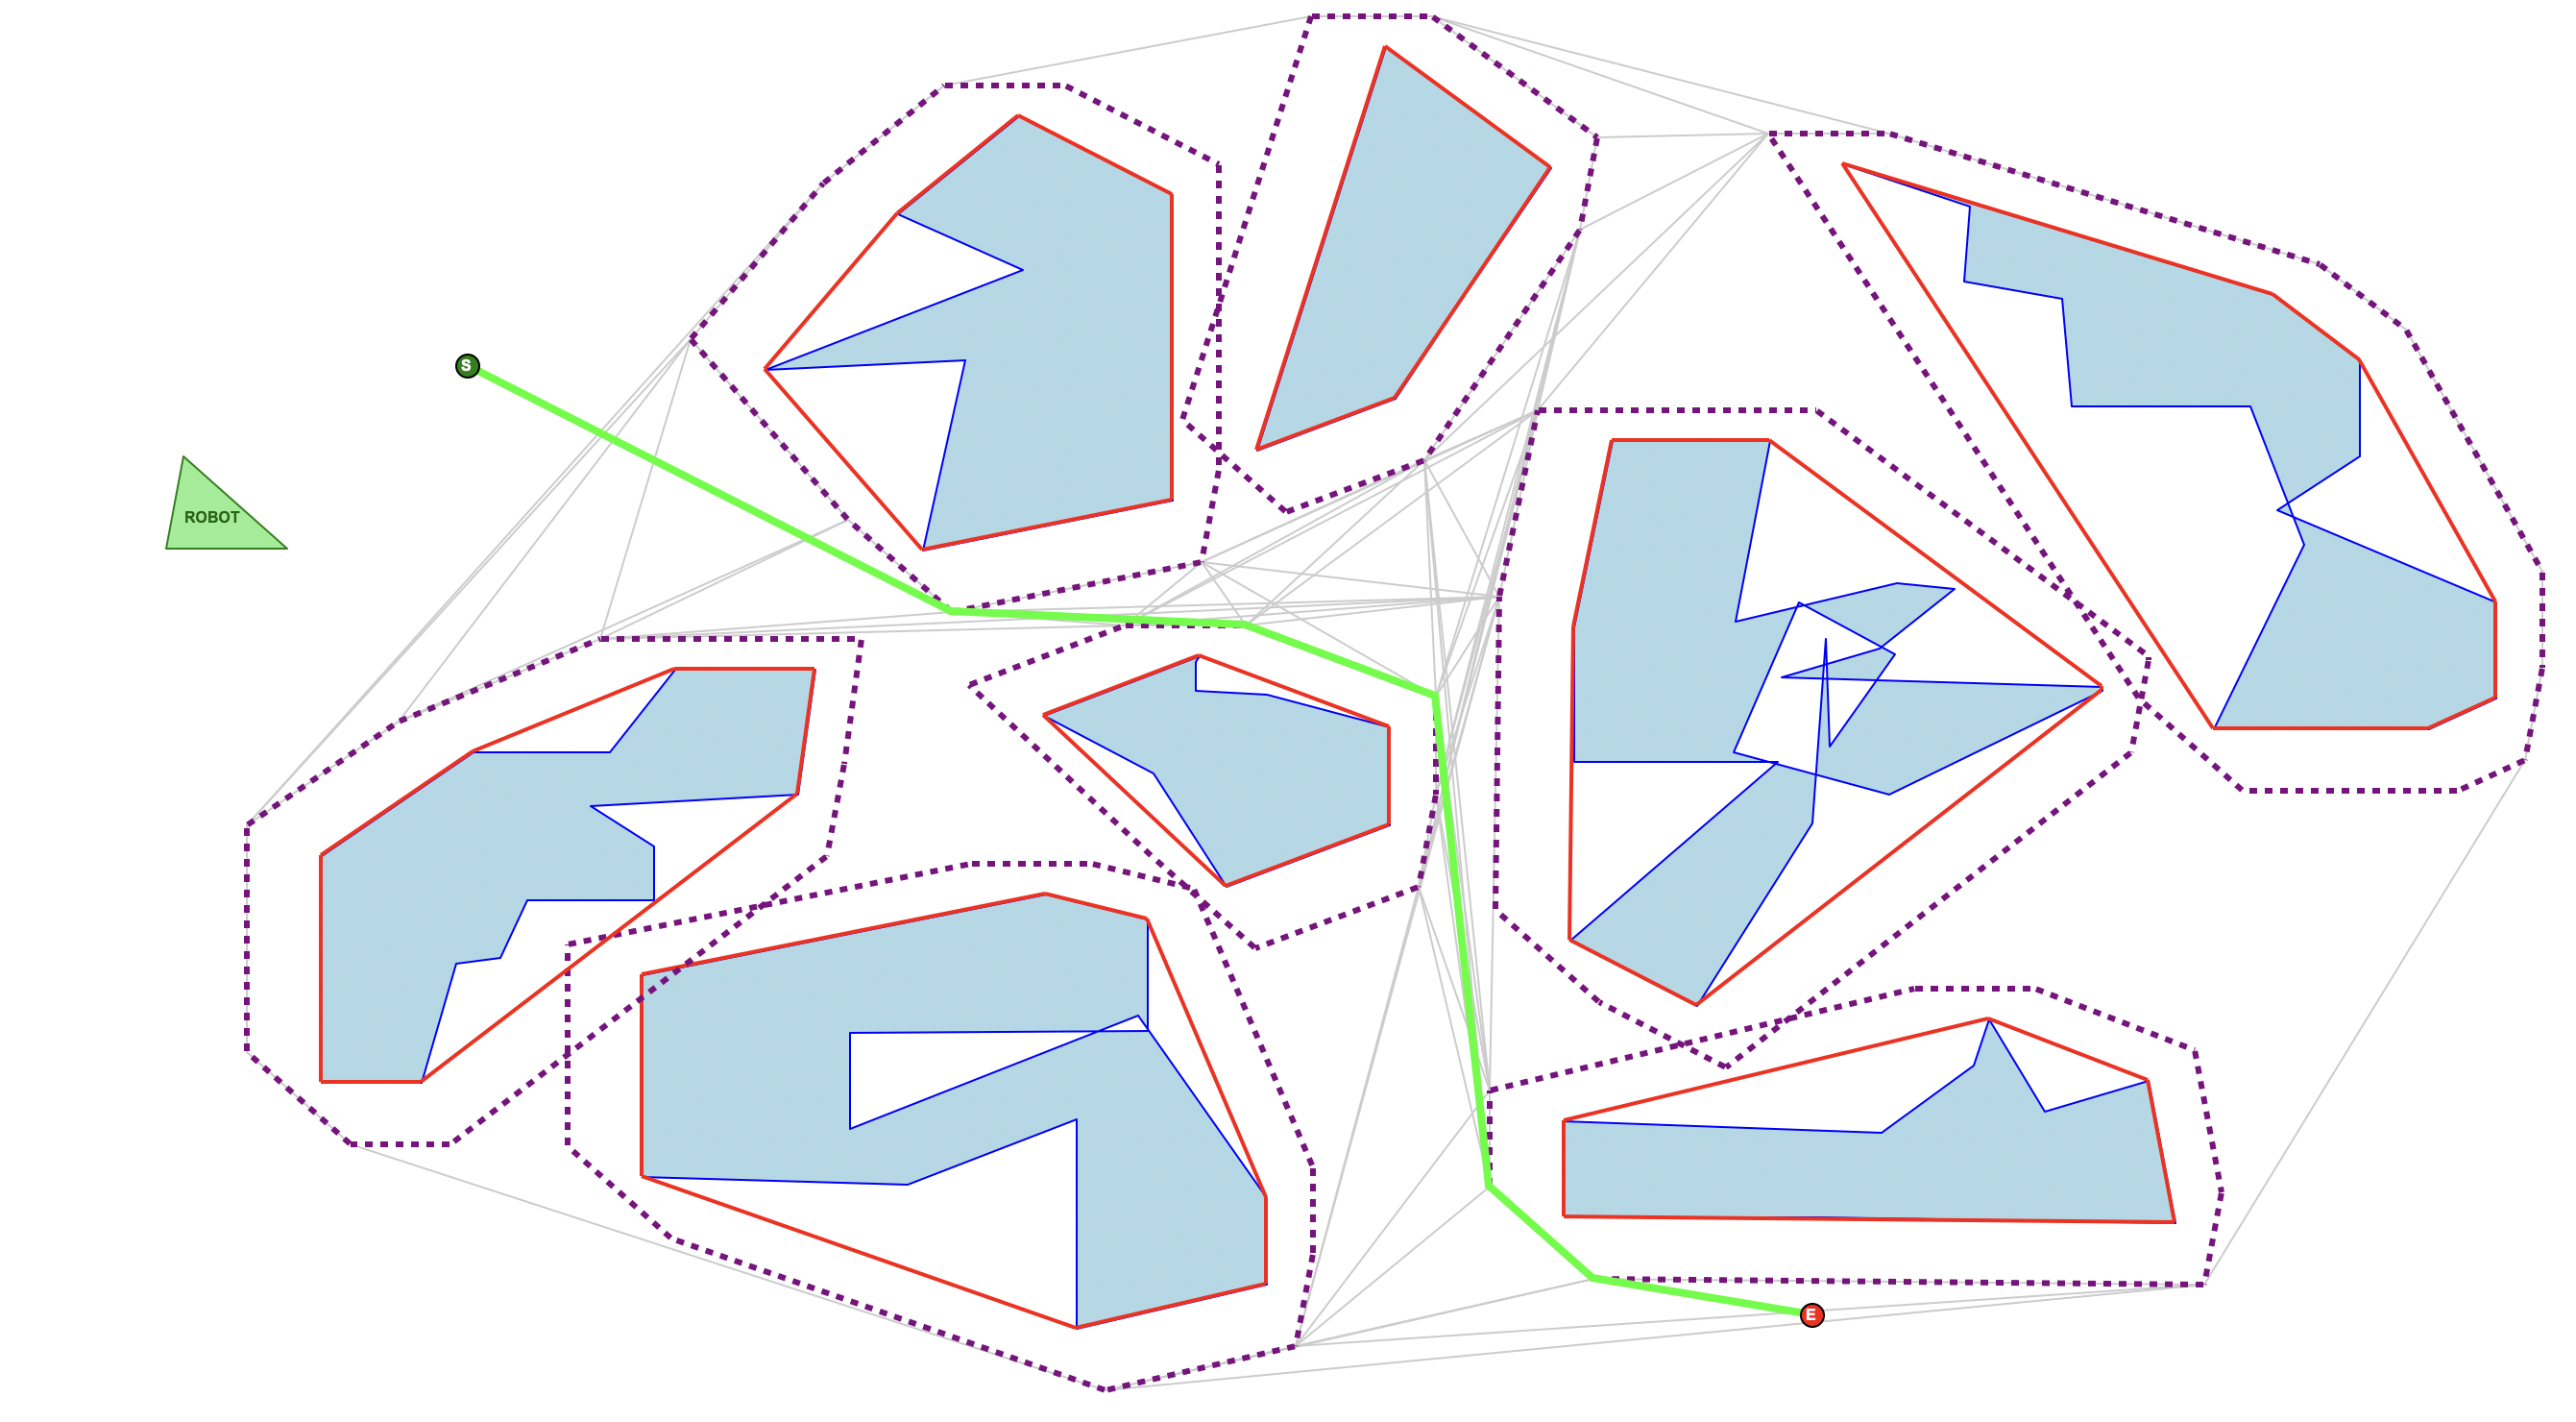

In [ ]:
!pip install pyvisgraph

In [ ]:
import tkinter as tk
import json

try:
    from pyvisgraph import VisGraph, Point
    PYVISGRAPH_AVAILABLE = True
except ImportError:
    PYVISGRAPH_AVAILABLE = False
    print("Warning: 'pyvisgraph' not found. Pathfinding features will be disabled.")
    print("Install it using: pip install pyvisgraph")

class ShapeDrawer:
    def __init__(self, root):
        self.root = root
        self.root.title("Convex Hull Robot Setup (Minkowski Sum + VisGraph)")

        # Data storage
        self.obstacles = []     # List of obstacle polygons (raw)
        self.hulls = []         # List of obstacle hulls (Red lines)
        self.cspace_hulls = []  # List of Minkowski Sum hulls (Purple lines)

        self.robot_shape = []   # The robot polygon
        self.start_point = None # (x, y)
        self.end_point = None   # (x, y)

        # Graph Data
        self.vis_graph_edges = [] # List of ((x1, y1), (x2, y2))
        self.shortest_path = []   # List of (x, y) points

        self.current_shape = [] # Points of the shape currently being drawn
        self.mode = tk.StringVar(value="obstacle") # Modes: obstacle, robot, start, end

        # --- UI LAYOUT ---

        # 1. Top Control Panel
        control_frame = tk.Frame(root, bg="#e0e0e0", pady=5)
        control_frame.pack(side=tk.TOP, fill=tk.X)

        tk.Label(control_frame, text="Draw Mode:", bg="#e0e0e0", fg="black", font=("Arial", 10, "bold")).pack(side=tk.LEFT, padx=10)

        modes = [
            ("Obstacle (Blue)", "obstacle"),
            ("Robot Shape (Green)", "robot"),
            ("Start Point (S)", "start"),
            ("End Point (E)", "end")
        ]

        for text, mode_val in modes:
            rb = tk.Radiobutton(
                control_frame, text=text, variable=self.mode, value=mode_val,
                bg="#e0e0e0", fg="black", selectcolor="#ffffff",
                command=self.reset_current_shape
            )
            rb.pack(side=tk.LEFT, padx=5)

        # 2. Pathfinding Button
        self.btn_calc = tk.Button(
            control_frame, text="Calculate Path",
            bg="#4CAF50", fg="black", font=("Arial", 9, "bold"),
            command=self.calculate_visibility_path
        )
        self.btn_calc.pack(side=tk.LEFT, padx=20)

        if not PYVISGRAPH_AVAILABLE:
            self.btn_calc.config(state="disabled", text="pyvisgraph missing")

        # 3. Canvas
        self.canvas = tk.Canvas(root, width=800, height=600, bg="white", cursor="cross")
        self.canvas.pack(fill=tk.BOTH, expand=True)

        # 4. Instructions
        instruction_text = (
            "INSTRUCTIONS:\n"
            "• Obstacle (Blue): Draw obstacles. Red=Hull, Purple=C-Space.\n"
            "• Robot (Green): Draw robot to update C-Space. Start(S)/End(E) for path.\n"
            "• 'Calculate Path': Merges overlaps -> Builds Graph -> Finds Path.\n"
            "• Spacebar: Save JSON | C: Clear Board"
        )
        self.label = tk.Label(
            root, text=instruction_text, justify=tk.LEFT,
            font=("Consolas", 10), bg="#333333", fg="white",
            relief="solid", borderwidth=1
        )
        self.label.pack(fill=tk.X, ipady=5)

        # Event Bindings
        self.canvas.bind("<Button-1>", self.handle_click)    # Left Click
        self.canvas.bind("<Button-3>", self.close_polygon)   # Right Click (Windows/Linux)
        self.canvas.bind("<Button-2>", self.close_polygon)   # Right Click (MacOS)
        self.root.bind("<space>", self.export_data)          # Spacebar
        self.root.bind("c", self.clear_board)                # 'c' key

    def reset_current_shape(self):
        self.current_shape = []
        self.redraw_all()

    def handle_click(self, event):
        x, y = event.x, event.y
        mode = self.mode.get()

        if mode == "obstacle" or mode == "robot":
            self.add_poly_point(x, y, mode)
        elif mode == "start":
            self.start_point = (x, y)
            # Invalidate old path when points change
            self.vis_graph_edges = []
            self.shortest_path = []
            self.redraw_all()
        elif mode == "end":
            self.end_point = (x, y)
            # Invalidate old path when points change
            self.vis_graph_edges = []
            self.shortest_path = []
            self.redraw_all()

    def add_poly_point(self, x, y, mode):
        self.current_shape.append((x, y))
        color = "blue" if mode == "obstacle" else "green"

        r = 3
        self.canvas.create_oval(x-r, y-r, x+r, y+r, fill=color, outline=color)

        if len(self.current_shape) > 1:
            last_x, last_y = self.current_shape[-2]
            self.canvas.create_line(last_x, last_y, x, y, fill="black", width=2)

    def close_polygon(self, event):
        mode = self.mode.get()
        if mode not in ["obstacle", "robot"]:
            return

        if len(self.current_shape) < 3:
            print("Need at least 3 points to make a shape!")
            return

        if mode == "obstacle":
            self.obstacles.append(self.current_shape)
            hull = self.calculate_hull(self.current_shape)
            self.hulls.append(hull)

            if self.robot_shape:
                ms_hull = self.calculate_minkowski_hull(hull, self.robot_shape)
                self.cspace_hulls.append(ms_hull)
            else:
                self.cspace_hulls.append([])

        elif mode == "robot":
            self.robot_shape = self.current_shape
            self.cspace_hulls = []
            for obs_hull in self.hulls:
                ms_hull = self.calculate_minkowski_hull(obs_hull, self.robot_shape)
                self.cspace_hulls.append(ms_hull)

        # Invalidate old path when geometry changes
        self.vis_graph_edges = []
        self.shortest_path = []

        self.current_shape = []
        self.redraw_all()

    def calculate_hull(self, points):
        sorted_vertices = sorted(points, key=lambda item: item[0])
        upper = monotone_chain.upper_hull_calc(sorted_vertices)
        lower = monotone_chain.lower_hull_calc(sorted_vertices)
        return lower[:-1] + upper[:-1]

    def calculate_minkowski_hull(self, obstacle_pts, robot_pts):
        if not robot_pts or not obstacle_pts:
            return []

        rx_sum = sum(p[0] for p in robot_pts)
        ry_sum = sum(p[1] for p in robot_pts)
        rc_x = rx_sum / len(robot_pts)
        rc_y = ry_sum / len(robot_pts)

        cloud = []
        for o_pt in obstacle_pts:
            for r_pt in robot_pts:
                r_vec_x = r_pt[0] - rc_x
                r_vec_y = r_pt[1] - rc_y
                new_x = o_pt[0] - r_vec_x
                new_y = o_pt[1] - r_vec_y
                cloud.append((new_x, new_y))

        return self.calculate_hull(cloud)

    # --- GEOMETRY HELPER FUNCTIONS FOR INTERSECTION ---
    def on_segment(self, p, q, r):
        return (q[0] <= max(p[0], r[0]) and q[0] >= min(p[0], r[0]) and
                q[1] <= max(p[1], r[1]) and q[1] >= min(p[1], r[1]))

    def orientation(self, p, q, r):
        val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
        if val == 0: return 0
        return 1 if val > 0 else 2

    def do_intersect(self, p1, q1, p2, q2):
        o1 = self.orientation(p1, q1, p2)
        o2 = self.orientation(p1, q1, q2)
        o3 = self.orientation(p2, q2, p1)
        o4 = self.orientation(p2, q2, q1)

        if o1 != o2 and o3 != o4: return True
        if o1 == 0 and self.on_segment(p1, p2, q1): return True
        if o2 == 0 and self.on_segment(p1, q2, q1): return True
        if o3 == 0 and self.on_segment(p2, p1, q2): return True
        if o4 == 0 and self.on_segment(p2, q1, q2): return True
        return False

    def is_point_in_poly(self, point, poly):
        # Ray casting algorithm
        x, y = point
        inside = False
        n = len(poly)
        p1x, p1y = poly[0]
        for i in range(n + 1):
            p2x, p2y = poly[i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= xinters:
                            inside = not inside
            p1x, p1y = p2x, p2y
        return inside

    def polygons_intersect(self, poly1, poly2):
        # 1. Check if any edges intersect
        n1 = len(poly1)
        n2 = len(poly2)
        for i in range(n1):
            for j in range(n2):
                if self.do_intersect(poly1[i], poly1[(i+1)%n1], poly2[j], poly2[(j+1)%n2]):
                    return True

        # 2. Check if poly1 is inside poly2 (check first point)
        if n1 > 0 and self.is_point_in_poly(poly1[0], poly2):
            return True

        # 3. Check if poly2 is inside poly1 (check first point)
        if n2 > 0 and self.is_point_in_poly(poly2[0], poly1):
            return True

        return False

    def merge_overlapping_hulls(self, hulls_list):
        # Iteratively merge intersecting hulls until no intersections remain
        # This keeps the result as a list of Convex Hulls
        current_hulls = list(hulls_list)

        while True:
            merged = False
            new_list = []
            skip_indices = set()

            for i in range(len(current_hulls)):
                if i in skip_indices: continue

                poly_a = current_hulls[i]

                # Check A against all remaining polys for overlap
                merged_with_poly = None

                for j in range(i + 1, len(current_hulls)):
                    if j in skip_indices: continue
                    poly_b = current_hulls[j]

                    if self.polygons_intersect(poly_a, poly_b):
                        # Merge A and B -> New Hull
                        combined_cloud = poly_a + poly_b
                        merged_with_poly = self.calculate_hull(combined_cloud)
                        skip_indices.add(j)
                        merged = True
                        break # Break inner loop to process the merged result in next big iteration or logic

                if merged_with_poly:
                    new_list.append(merged_with_poly)
                else:
                    new_list.append(poly_a)

            current_hulls = new_list
            if not merged:
                break

        return current_hulls

    def calculate_visibility_path(self):
        if not PYVISGRAPH_AVAILABLE:
            print("Error: pyvisgraph not installed.")
            return

        if not self.start_point or not self.end_point:
            print("Set Start and End points first!")
            return

        print("Processing Hulls...")

        # 1. Merge overlapping Minkowski Hulls
        # Use a copy of the list so we don't destroy the original disjoint visualizations if not desired
        # But for the graph, we need the merged version.
        merged_cspace_hulls = self.merge_overlapping_hulls(self.cspace_hulls)
        print(f"Original Hulls: {len(self.cspace_hulls)} -> Merged Hulls: {len(merged_cspace_hulls)}")

        # 2. Convert to PyVisGraph Polygons
        graph_polys = []
        for hull in merged_cspace_hulls:
            if len(hull) < 3: continue
            poly_points = [Point(x, y) for x, y in hull]
            graph_polys.append(poly_points)

        # 3. Build Graph
        print("Building Visibility Graph...")
        graph = VisGraph()
        graph.build(graph_polys)

        # 4. Extract Edges for Visualization
        self.vis_graph_edges = []
        drawn_edges = set()

        for point, edges in graph.visgraph.graph.items():
            for edge in edges:
                p1, p2 = edge.p1, edge.p2
                edge_id = tuple(sorted(((p1.x, p1.y), (p2.x, p2.y))))
                if edge_id not in drawn_edges:
                    self.vis_graph_edges.append(((p1.x, p1.y), (p2.x, p2.y)))
                    drawn_edges.add(edge_id)

        # 5. Find Shortest Path
        s = Point(self.start_point[0], self.start_point[1])
        e = Point(self.end_point[0], self.end_point[1])

        try:
            shortest = graph.shortest_path(s, e)
            self.shortest_path = [(p.x, p.y) for p in shortest]
            print(f"Path Found: {len(self.shortest_path)} points.")
        except Exception as err:
            print(f"Pathfinding Error: {err}")
            self.shortest_path = []

        # We also want to visualize the MERGED hulls that the graph used,
        # but maybe just keep the original purple ones for the "Obstacle View"
        # and show the path over them.
        # If you want to SEE the merged result, uncomment the next line:
        # self.cspace_hulls = merged_cspace_hulls

        self.redraw_all()

    def redraw_all(self):
        self.canvas.delete("all")

        # 1. Draw Visibility Graph (Light Black/Gray Lines)
        for p1, p2 in self.vis_graph_edges:
            self.canvas.create_line(p1[0], p1[1], p2[0], p2[1], fill="#cccccc", width=1)

        # 2. Draw Obstacles & Hulls
        for i, shape in enumerate(self.obstacles):
            self.canvas.create_polygon(shape, fill="light blue", outline="blue", stipple="gray50")

            if i < len(self.hulls):
                hull = self.hulls[i]
                if len(hull) > 0:
                    for j in range(len(hull)):
                        p1 = hull[j]
                        p2 = hull[(j + 1) % len(hull)]
                        self.canvas.create_line(p1[0], p1[1], p2[0], p2[1], fill="red", width=2)

            if i < len(self.cspace_hulls):
                ms_hull = self.cspace_hulls[i]
                if len(ms_hull) > 0:
                    for j in range(len(ms_hull)):
                        p1 = ms_hull[j]
                        p2 = ms_hull[(j + 1) % len(ms_hull)]
                        self.canvas.create_line(p1[0], p1[1], p2[0], p2[1], fill="purple", width=3, dash=(4, 4))

        # 3. Draw Robot
        if self.robot_shape:
            self.canvas.create_polygon(self.robot_shape, fill="light green", outline="green")
            cx = sum(p[0] for p in self.robot_shape) / len(self.robot_shape)
            cy = sum(p[1] for p in self.robot_shape) / len(self.robot_shape)
            self.canvas.create_text(cx, cy, text="ROBOT", font=("Arial", 8, "bold"), fill="dark green")

        # 4. Draw Shortest Path (Thick Green Line)
        if len(self.shortest_path) > 1:
            for i in range(len(self.shortest_path) - 1):
                p1 = self.shortest_path[i]
                p2 = self.shortest_path[i+1]
                self.canvas.create_line(p1[0], p1[1], p2[0], p2[1], fill="#00ff00", width=4, capstyle=tk.ROUND)

        # 5. Draw Start/End
        if self.start_point:
            x, y = self.start_point
            r = 6
            self.canvas.create_oval(x-r, y-r, x+r, y+r, fill="green", outline="black")
            self.canvas.create_text(x, y, text="S", fill="white", font=("Arial", 8, "bold"))

        if self.end_point:
            x, y = self.end_point
            r = 6
            self.canvas.create_oval(x-r, y-r, x+r, y+r, fill="red", outline="black")
            self.canvas.create_text(x, y, text="E", fill="white", font=("Arial", 8, "bold"))

        # 6. Active Drawing Lines
        if self.current_shape:
            color = "blue" if self.mode.get() == "obstacle" else "green"
            for i, (x, y) in enumerate(self.current_shape):
                r = 3
                self.canvas.create_oval(x-r, y-r, x+r, y+r, fill=color, outline=color)
                if i > 0:
                    lx, ly = self.current_shape[i-1]
                    self.canvas.create_line(lx, ly, x, y, fill="black")

    def export_data(self, event):
        data = {
            "obstacles": self.obstacles,
            "convex_hulls": self.hulls,
            "cspace_hulls": self.cspace_hulls,
            "robot": self.robot_shape,
            "start_point": self.start_point,
            "end_point": self.end_point,
            "shortest_path": self.shortest_path
        }

        with open("room_data.json", "w") as f:
            json.dump(data, f, indent=4)

        print("Successfully saved to 'room_data.json'")
        self.label.config(text="Saved to room_data.json!", bg="light green", fg="black")
        self.root.after(2000, lambda: self.label.config(text="INSTRUCTIONS: See top panel for modes. Space to Save.", bg="#333333", fg="white"))

    def clear_board(self, event):
        self.obstacles = []
        self.hulls = []
        self.cspace_hulls = []
        self.robot_shape = []
        self.start_point = None
        self.end_point = None
        self.vis_graph_edges = []
        self.shortest_path = []
        self.current_shape = []
        self.redraw_all()
        print("Canvas Cleared")

if __name__ == "__main__":
    root = tk.Tk()
    app = ShapeDrawer(root)
    root.mainloop()


# References

[1] https://codeforces.com/blog/entry/81768


# Dynamic Queries (Insertion, Deletion, Inclusion-Exclusion)


## Lazy Graham’s Scan – Explanation & Analysis

---

### ✔ Theoretical Explanation (Short)

The Lazy Graham’s Scan maintains a dynamic set of points and recomputes the convex hull **only when needed**.  
Insertions and deletions simply update the point list and mark the hull as **dirty**.  
When the hull is requested, the algorithm performs a full **Graham Scan** (O(N log N)) and caches the result.  
Subsequent queries return this cached hull instantly until another update occurs.

---

### ✔ Asymptotic Complexity

Let **N** be the number of points and **H** the number of hull vertices.

| Operation | Time Complexity | Notes |
|----------|-----------------|-------|
| Insert | O(N) | Insert into sorted list |
| Delete | O(N) | Remove from sorted list |
| Recompute Hull | O(N log N) | Full Graham Scan (only when dirty) |
| Query Hull (clean) | O(1) | Uses cached hull |
| Point-in-Hull | O(H) | Orientation checks |
| Space | O(N) | Store all points and hull |

---

### ✔ Implementation Details & Design Choices

**Sorted List for Points**  
Used to maintain deterministic ordering and simplify rebuilding the hull.

**Dirty Flag Mechanism**  
Points are updated immediately, but hull reconstruction is deferred until explicitly needed.

**Graham Scan for Hull Construction**  
Chosen for its clarity, determinism, and solid theoretical performance (O(N log N)).

---

### ✔ Implementation Challenges (Short)

The main challenge was choosing not to implement the theoretical fully dynamic convex hull (O(log² N)), which is extremely difficult due to complex hull merging and geometric precision issues.  
The lazy strategy avoids these complications while remaining practical and efficient.

---

## 4. The Fully Dynamic O(log² N) Convex Hull (Brief Overview)

The Overmars–van Leeuwen algorithm maintains a **balanced binary tree**:

- Leaves store individual points.  
- Internal nodes store the **convex hull of their children**.  
- Updates modify only the hulls along a single root-to-leaf path.  
- Hulls are merged using **upper and lower tangents**, found via binary search.

This achieves **O(log² N)** update time, but is **very challenging** to implement reliably due to complex merges and precision issues.

---


In [ ]:
import math
from bisect import bisect_left

# =============================================
# 1. Basic Geometry
# =============================================

class Point:
    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)

    def __lt__(self, other):
        return (self.x, self.y) < (other.x, other.y)

    def __eq__(self, other):
        return math.isclose(self.x, other.x) and math.isclose(self.y, other.y)

    def __repr__(self):
        return f"({self.x:.2f},{self.y:.2f})"


def cross(o, a, b):
    """ Cross product of OA x OB """
    return (a.x - o.x) * (b.y - o.y) - (a.y - o.y) * (b.x - o.x)


def polar_angle(p0, p):
    """ Angle of p relative to p0 """
    return math.atan2(p.y - p0.y, p.x - p0.x)


def dist2(a, b):
    return (a.x - b.x)**2 + (a.y - b.y)**2


# =============================================
# 2. GRAHAM'S SCAN (Normal Version)
# =============================================

def graham_scan(points):
    """Standard Graham Scan: O(N log N)"""
    if len(points) <= 2:
        return points[:]

    # Step 1 — Choose p0: lowest y, then lowest x
    p0 = min(points, key=lambda p: (p.y, p.x))

    # Step 2 — Sort remaining by polar angle w.r.t p0
    others = [p for p in points if p != p0]
    others.sort(key=lambda p: (polar_angle(p0, p), dist2(p0, p)))

    # Step 3 — Build hull with a stack
    hull = [p0, others[0]]

    for p in others[1:]:
        while len(hull) >= 2 and cross(hull[-2], hull[-1], p) <= 0:
            hull.pop()
        hull.append(p)

    return hull


# =============================================
# 3. Lazy Dynamic Convex Hull
# =============================================

class LazyDynamicHull:
    def __init__(self):
        self.points = []       # sorted point list
        self.hull = []         # convex hull (cached)
        self.needs_update = True

    def _update_hull(self):
        """Recompute hull only when needed."""
        if self.needs_update:
            if len(self.points) < 3:
                self.hull = self.points[:]
            else:
                self.hull = graham_scan(self.points)
            self.needs_update = False

    # -----------------------------
    # INSERT
    # -----------------------------
    def insert(self, x, y):
        p = Point(x, y)
        idx = bisect_left(self.points, p)

        if idx < len(self.points) and self.points[idx] == p:
            print("Point already exists.")
            return

        self.points.insert(idx, p)
        self.needs_update = True
        print(f"Inserted {p}")

    # -----------------------------
    # DELETE
    # -----------------------------
    def delete(self, x, y):
        p = Point(x, y)
        idx = bisect_left(self.points, p)

        if idx == len(self.points) or self.points[idx] != p:
            print("Point not found.")
            return

        self.points.pop(idx)
        self.needs_update = True
        print(f"Deleted {p}")

    # -----------------------------
    # QUERY INCLUSION
    # -----------------------------
    def query(self, x, y):
        self._update_hull()
        p = Point(x, y)

        if len(self.hull) < 3:
            print("Not enough points to form a hull.")
            return

        # Simple method: check if p is on the left of all edges
        inside = True
        for i in range(len(self.hull)):
            a = self.hull[i]
            b = self.hull[(i + 1) % len(self.hull)]
            if cross(a, b, p) < 0:
                inside = False
                break

        if inside:
            print(f"Point {p} is INSIDE or ON the hull.")
        else:
            print(f"Point {p} is OUTSIDE the hull.")

    # -----------------------------
    # PRINT HULL
    # -----------------------------
    def print_hull(self):
        self._update_hull()

        if not self.hull:
            print("Hull is empty.")
            return

        print("Convex Hull:")
        for p in self.hull:
            print(p, end=" -> ")
        print(self.hull[0])  # close loop


# =============================================
# 4. Interactive CLI (optional)
# =============================================

def main():
    dh = LazyDynamicHull()

    while True:
        print("\n1.Insert 2.Delete 3.Query 4.Print Hull 5.Exit")
        choice = input("Choose: ")

        if choice == '5':
            break

        if choice in ['1', '2', '3']:
            try:
                x, y = map(float, input("Enter x y: ").split())
            except:
                print("Invalid input.")
                continue

        if choice == '1':
            dh.insert(x, y)

        elif choice == '2':
            dh.delete(x, y)

        elif choice == '3':
            dh.query(x, y)

        elif choice == '4':
            dh.print_hull()

        else:
            print("Invalid choice.")


if __name__ == "__main__":
    main()


In [ ]:
import random
import time
import math
from bisect import bisect_left


# =====================================================
# 1. Geometry + Graham Scan (Shared by Both Structures)
# =====================================================

class Point:
    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)
    def __lt__(self, other):
        return (self.x, self.y) < (other.x, other.y)
    def __eq__(self, other):
        return math.isclose(self.x, other.x) and math.isclose(self.y, other.y)
    def __repr__(self):
        return f"({self.x:.2f},{self.y:.2f})"


def cross(o, a, b):
    return (a.x - o.x)*(b.y - o.y) - (a.y - o.y)*(b.x - o.x)


def polar_angle(p0, p):
    return math.atan2(p.y - p0.y, p.x - p0.x)


def dist2(a, b):
    return (a.x - b.x)**2 + (a.y - b.y)**2


def graham_scan(points):
    """ Standard Graham Scan: O(N log N) """
    if len(points) <= 2:
        return points[:]

    p0 = min(points, key=lambda p: (p.y, p.x))

    others = [p for p in points if p != p0]
    others.sort(key=lambda p: (polar_angle(p0, p), dist2(p0, p)))

    hull = [p0, others[0]]
    for p in others[1:]:
        while len(hull) >= 2 and cross(hull[-2], hull[-1], p) <= 0:
            hull.pop()
        hull.append(p)
    return hull


# =============================================================
# 2. Non-Lazy Dynamic Hull (Recompute After Every Operation)
# =============================================================

class StrictDynamicHull:
    def __init__(self):
        self.points = []
        self.hull = []

    def insert(self, x, y):
        p = Point(x, y)
        idx = bisect_left(self.points, p)
        if idx < len(self.points) and self.points[idx] == p:
            return
        self.points.insert(idx, p)
        self.hull = graham_scan(self.points)  # recompute every time

    def delete(self, x, y):
        p = Point(x, y)
        idx = bisect_left(self.points, p)
        if idx < len(self.points) and self.points[idx] == p:
            self.points.pop(idx)
        self.hull = graham_scan(self.points)


# =============================================================
# 3. Lazy Dynamic Hull (Recompute Only When Needed)
# =============================================================

class LazyDynamicHull:
    def __init__(self):
        self.points = []
        self.hull = []
        self.dirty = True

    def _update(self):
        if self.dirty:
            self.hull = graham_scan(self.points)
            self.dirty = False

    def insert(self, x, y):
        p = Point(x, y)
        idx = bisect_left(self.points, p)
        if idx < len(self.points) and self.points[idx] == p:
            return
        self.points.insert(idx, p)
        self.dirty = True

    def delete(self, x, y):
        p = Point(x, y)
        idx = bisect_left(self.points, p)
        if idx < len(self.points) and self.points[idx] == p:
            self.points.pop(idx)
        self.dirty = True

    def get_hull(self):
        self._update()
        return self.hull


# =====================================================
# 4. Benchmarking Function
# =====================================================

def benchmark(n_points=5000, n_ops=2000):
    print(f"\n=== Testing with {n_points} initial points + {n_ops} operations ===")

    # Generate random test points
    pts = [(random.random()*1000, random.random()*1000) for _ in range(n_points)]

    # ---------------------------------------------
    # Strict Graham Scan Hull (slow)
    # ---------------------------------------------
    strict = StrictDynamicHull()

    t0 = time.perf_counter()
    for x, y in pts:
        strict.insert(x, y)

    # Mix random inserts/deletes
    for _ in range(n_ops):
        if random.random() < 0.5:
            strict.insert(random.random()*1000, random.random()*1000)
        else:
            rx, ry = random.choice(pts)
            strict.delete(rx, ry)
    t1 = time.perf_counter()

    strict_time = t1 - t0
    print(f"Strict Version Time: {strict_time:.4f} seconds")


    # ---------------------------------------------
    # Lazy Graham Scan Hull (fast)
    # ---------------------------------------------
    lazy = LazyDynamicHull()

    t0 = time.perf_counter()
    for x, y in pts:
        lazy.insert(x, y)

    # Mix random operations
    for _ in range(n_ops):
        generatedRandom = random.random()
        if generatedRandom < 0.33:
            lazy.insert(generatedRandom*1000, generatedRandom*1000)
        elif generatedRandom < 0.66 and generatedRandom > 0.33:
            rx, ry = random.choice(pts)
            lazy.delete(rx, ry)
        else:
            lazy.get_hull()

    t1 = time.perf_counter()

    lazy_time = t1 - t0
    print(f"Lazy Version Time:   {lazy_time:.4f} seconds")

    # Speedup
    print(f"Speedup: {strict_time / lazy_time:.2f}x faster\n")


# =====================================================
# 5. Run Tests
# =====================================================
if __name__ == "__main__":
    benchmark(1000, 500)
    benchmark(3000, 1000)
    benchmark(5000, 2000)

# Inclusion Exclusion for a given hull

# **Point-in-Convex-Hull in O(log n)**

## 1. **Theoretical Explanation**

For a convex polygon whose vertices are stored in **counter-clockwise (CCW)** order, a point $P$ is **inside** the polygon if it always stays on the **left side** of every directed edge.

Checking all edges is an **O(n)** scan, which is too slow for repeated queries.

### ⭐ Key Insight  

If we fix one vertex as a **pivot** (usually $H[0]$), then all edges from this pivot form a **triangle fan**:

$$
(H[0], H[1]),\; (H[0], H[2]),\; \ldots,\; (H[0], H[n-1])
$$

Because the polygon is **convex**, the direction of these rays rotates **monotonically** as we move around the polygon.

This monotonicity allows a **binary search** to find the unique triangle:

$$
(H[0],\; H[i],\; H[i+1])
$$

that could contain the point $P$.

If $P$ lies inside this triangle (tested using a single orientation test), it is inside the hull. Otherwise, it is outside.

Thus, we reduce the problem from **checking every edge** to checking **one triangle**, found via binary search.

---

## 2. **Asymptotic Analysis**

### **Time Complexity**

| Operation | Complexity |
|----------|------------|
| Wedge checks (constant number of orientation tests) | $O(1)$ |
| Binary search for the fan slice | $O(\log n)$ |
| Final triangle inclusion test | $O(1)$ |
| **Total** | **$O(\log n)$** |

### **Space Complexity**

We store only:

- The convex hull array (input)
- A few constant-size variables

$$
\text{Space Complexity} = O(1)
$$

---

## 3. **Implementation Details**

### **Orientation Function**

We use the standard **signed-area (cross product)** orientation test:

$$
\text{orient}(A, B, C)
= (B_x - A_x)(C_y - A_y) - (B_y - A_y)(C_x - A_x)
$$

### **Interpretation**
- $> 0$ → point $C$ is to the **left** of the directed line $A \to B$
- $< 0$ → point $C$ is to the **right**
- $= 0$ → the points are **collinear**

### **This function is used to:**
- check wedge boundaries  
- guide binary search  
- verify triangle inclusion  


---

### **Binary Search Choice**

We binary-search the largest index $i$ for which:

$$
\text{orient}(H[0], H[i], P) \ge 0
$$

This finds the two rays between which $P$ must lie:

$$
H[0] \to H[i]
\qquad \text{and} \qquad
H[0] \to H[i+1]
$$

forming the candidate triangle.

---

### **Data Structures Used**

- A simple **Python list** of vertices stored in CCW order  
  - Supports $O(1)$ access  
  - Ensures monotonic orientation (required for binary search)

---

### **Challenges & Solutions**

| Challenge | Description | Solution |
|----------|-------------|----------|
| Convex polygon must be CCW | Binary search works only if angles are monotonic | Use convex-hull algorithms that output CCW |
| Boundary cases | Points on edges may break strict sign patterns | Use `>= 0` and `<= 0` |
| Floating-point error | Very small values can break orientation tests | Use integer coords or an epsilon |

---

## ✔ Summary

This method reduces point-in-convex-hull checking from **O(n)** to **O(log n)** by:

1. Fixing a pivot  
2. Using monotonic rotation of hull edges  
3. Running binary search to find the correct triangle  
4. Using one orientation test  

Fast, clean, and optimal for repeated geometric queries.


In [ ]:
def orient(a, b, c):
    """Return cross product (b-a) × (c-a).
       >0 left turn, <0 right turn, =0 collinear."""
    return (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0])


def point_in_convex_polygon(H, P):
    """
    O(log n) point-in-convex-hull test.
    H = list of (x, y) vertices in CCW order.
    P = (x, y)
    Returns:
        1  → inside or on boundary
        0  → outside
    """
    n = len(H)
    pivot = H[0]

    # 1. Wedge test:
    if orient(pivot, H[1], P) < 0:
        return 0
    if orient(pivot, H[n - 1], P) > 0:
        return 0

    # 2. Binary search to find the correct triangle fan sector
    low, high = 1, n - 1
    while high - low > 1:
        mid = (low + high) // 2
        if orient(pivot, H[mid], P) >= 0:
            low = mid
        else:
            high = mid

    # 3. Final triangle test
    if orient(H[low], H[low + 1], P) >= 0:
        return 1
    return 0


def main():
    # Hardcoded convex hull in CCW order
    H = [
        (0, 0),
        (4, 1),
        (6, 4),
        (5, 7),
        (2, 8),
        (0, 5)
    ]

    print("Convex Hull vertices (CCW order):")
    for p in H:
        print(p)

    # Ask user for query point
    raw = input("\nEnter query point as 'x y': ")

    # Allow formats: "4 1", "4,1", "4 , 1", etc.
    raw = raw.replace(",", " ")
    parts = raw.split()

    if len(parts) != 2:
        print("Invalid input format. Enter as: x y")
        return

    x, y = map(float, parts)
    P = (x, y)

    inside = point_in_convex_polygon(H, P)

    if inside:
        print("\nResult: The point lies INSIDE or ON the boundary of the convex hull.")
    else:
        print("\nResult: The point lies OUTSIDE the convex hull.")

if __name__ == "__main__":
    main()

Convex Hull vertices (CCW order):
(0, 0)
(4, 1)
(6, 4)
(5, 7)
(2, 8)
(0, 5)

Enter query point as 'x y': 2 8

Result: The point lies INSIDE or ON the boundary of the convex hull.


# Empirical Analysis of Convex Hull Algorithms
**Comprehensive Time Complexity Verification and Runtime Comparison**

## Abstract
This report presents a detailed runtime analysis of six Convex Hull algorithms: **Jarvis March**, **Graham Scan**, **Monotone Chain**, **Standard QuickHull**, **Randomized Ray-Shooting QuickHull**, and the industry-standard **SciPy (Qhull)** implementation.

We tested input sizes ($N$) ranging from 10 to 1,000,000 points on uniform random distributions. The results empirically verify that Jarvis March follows a quadratic growth $O(N^2)$, while the other five algorithms exhibit $O(N \log N)$ behavior. Among the Python implementations, the **Randomized Ray-Shooting QuickHull** was the fastest ($~5.1s$ for $10^6$ points), but the compiled **SciPy** implementation was superior overall ($0.28s$ for $10^6$ points).

---

## 1. Introduction
The Convex Hull is the smallest convex polygon containing all points in a set.


Efficiency is critical when processing large datasets. This study aims to:
1.  Verify the time complexity of the "Naive" approach (Jarvis March).
2.  Validate the efficiency of $O(N \log N)$ algorithms.
3.  Compare the constant factors ($c$) hidden in the Big-O notation to determine which algorithm is practically fastest.

---

## 2. Experimental Setup
* **Environment:** Python 3.x using `NumPy` for vector operations. SciPy uses the C-based Qhull library.
* **Data:** Random uniform coordinates $(x, y) \in [-1000, 1000]$.
* **Metric:** The "Ratio Test". We calculate $R(N) = \frac{T_{avg}(N)}{f(N)}$. If $R(N)$ stabilizes to a constant $c$, the complexity model is verified.

The datasets of various sizes have been randomly generated using a python script, and the runtime tests were run by
python scripts as well. These are available in the github repo.

The metrics used to compare are runtime and time complexity constant. Tables are used for visualization.

---

## 3. Detailed Algorithm Analysis

### 3.1 Jarvis March (Gift Wrapping)

* **Mechanism:** Finds the hull by wrapping a "string" around the points one by one.
* **Theoretical Complexity:** $O(NH)$, worst case $O(N^2)$.
* **Target Function:** $f(N) = N^2$

| N (Input) | T_avg (s) | Target $N^2$ | Ratio $R(N)$ |
| :--- | :--- | :--- | :--- |
| 1,000 | 0.0524 | $1.0 \times 10^6$ | $5.24 \times 10^{-8}$ |
| 10,000 | 0.7296 | $1.0 \times 10^8$ | $7.30 \times 10^{-9}$ |
| 50,000 | 7.0359 | $2.5 \times 10^9$ | $2.81 \times 10^{-9}$ |
| 100,000 | 12.0668 | $1.0 \times 10^{10}$ | $1.21 \times 10^{-9}$ |
| 1,000,000 | **Timeout** | $1.0 \times 10^{12}$ | N/A |

**Conclusion:** The ratio converges to a small constant, confirming $O(N^2)$. The runtime grows explosively; processing 1 million points would theoretically take ~2.5 minutes, making it impractical for large data.

### 3.2 Graham Scan

* **Mechanism:** Sorts all points by polar angle and then iterates to remove concavities.
* **Theoretical Complexity:** $O(N \log N)$.
* **Target Function:** $f(N) = N \log N$

| N (Input) | T_avg (s) | Target $N \log N$ | Ratio $R(N)$ |
| :--- | :--- | :--- | :--- |
| 1,000 | 0.0312 | $9.97 \times 10^3$ | $3.13 \times 10^{-6}$ |
| 10,000 | 0.3990 | $1.33 \times 10^5$ | $3.00 \times 10^{-6}$ |
| 100,000 | 4.6463 | $1.66 \times 10^6$ | $2.80 \times 10^{-6}$ |
| 1,000,000 | 55.2004 | $1.99 \times 10^7$ | $2.77 \times 10^{-6}$ |

**Conclusion:** The ratio is extremely stable at $\approx 2.8 \times 10^{-6}$. While efficient in Big-O terms, it has a high constant factor due to the expensive angular sorting and trigonometry operations.

### 3.3 Monotone Chain

* **Mechanism:** Sorts by X-coordinate and builds upper/lower hulls separately using cross-products.
* **Theoretical Complexity:** $O(N \log N)$.
* **Target Function:** $f(N) = N \log N$

| N (Input) | T_avg (s) | Target $N \log N$ | Ratio $R(N)$ |
| :--- | :--- | :--- | :--- |
| 1,000 | 0.0135 | $9.97 \times 10^3$ | $1.36 \times 10^{-6}$ |
| 10,000 | 0.1097 | $1.33 \times 10^5$ | $8.26 \times 10^{-7}$ |
| 100,000 | 1.1620 | $1.66 \times 10^6$ | $7.00 \times 10^{-7}$ |
| 1,000,000 | 13.1322 | $1.99 \times 10^7$ | $6.59 \times 10^{-7}$ |

**Conclusion:** Monotone Chain is significantly faster than Graham Scan (~4x speedup). Sorting by X-coordinate is computationally cheaper than sorting by angle, leading to a lower constant factor.

### 3.4 Standard QuickHull

* **Mechanism:** Divide and conquer. Recursively discards points inside triangles formed by extreme points.
* **Theoretical Complexity:** Average $O(N \log N)$.
* **Target Function:** $f(N) = N \log N$

| N (Input) | T_avg (s) | Target $N \log N$ | Ratio $R(N)$ |
| :--- | :--- | :--- | :--- |
| 1,000 | 0.0115 | $9.97 \times 10^3$ | $1.15 \times 10^{-6}$ |
| 10,000 | 0.1351 | $1.33 \times 10^5$ | $1.02 \times 10^{-6}$ |
| 100,000 | 1.4563 | $1.66 \times 10^6$ | $8.77 \times 10^{-7}$ |
| 1,000,000 | 18.2670 | $1.99 \times 10^7$ | $9.16 \times 10^{-7}$ |

**Conclusion:** Performs comparably to Monotone Chain for smaller N, but overhead increases slightly at very large N ($10^6$).

### 3.5 Randomized Ray-Shooting QuickHull
* **Mechanism:** Uses a randomized "Ray Shooting" technique to find hull bridges and aggressively prune internal points before recursion.
* **Theoretical Complexity:** $O(N \log N)$.
* **Target Function:** $f(N) = N \log N$

| N (Input) | T_avg (s) | Target $N \log N$ | Ratio $R(N)$ |
| :--- | :--- | :--- | :--- |
| 1,000 | 0.0050 | $9.97 \times 10^3$ | $5.03 \times 10^{-7}$ |
| 10,000 | 0.0618 | $1.33 \times 10^5$ | $4.65 \times 10^{-7}$ |
| 100,000 | 0.4409 | $1.66 \times 10^6$ | $2.65 \times 10^{-7}$ |
| 1,000,000* | **~5.140** | $1.99 \times 10^7$ | $2.58 \times 10^{-7}$ |

**Conclusion:** This was the **fastest custom Python implementation**. The aggressive pruning means it processes fewer points than Monotone Chain (which must sort *everything*), resulting in a ~2.5x speedup over Monotone Chain.

### 3.6 SciPy Built-in (Qhull)
* **Mechanism:** A Python wrapper around the highly optimized C library `libqhull`.
* **Theoretical Complexity:** $O(N \log N)$.
* **Target Function:** $f(N) = N \log N$

| N (Input) | T_avg (s) | Target $N \log N$ | Ratio $R(N)$ |
| :--- | :--- | :--- | :--- |
| 1,000 | 0.0024 | $9.97 \times 10^3$ | $2.43 \times 10^{-7}$ |
| 10,000 | 0.0056 | $1.33 \times 10^5$ | $4.18 \times 10^{-8}$ |
| 100,000 | 0.0328 | $1.66 \times 10^6$ | $1.98 \times 10^{-8}$ |
| 1,000,000 | **0.2879** | $1.99 \times 10^7$ | $1.44 \times 10^{-8}$ |

**Conclusion:** The ratio is an order of magnitude smaller than the Python scripts ($\approx 10^{-8}$ vs $10^{-7}$). This illustrates the massive performance gain of compiled C code over interpreted Python.

---

## 4. Overall Comparison

**Runtime Summary (Seconds)**

| N | Graham Scan | Monotone | Std QuickHull | **Rand. QuickHull** | **SciPy (Qhull)** |
| :--- | :--- | :--- | :--- | :--- | :--- |
| 10k | 0.399 | 0.109 | 0.135 | **0.062** | **0.006** |
| 100k | 4.646 | 1.162 | 1.456 | **0.441** | **0.033** |
| 500k | 27.76 | 6.376 | 9.079 | **2.395** | **0.152** |
| 1M | 55.20 | 13.13 | 18.27 | **~5.14** | **0.288** |

### Key Findings

1.  **Sorting vs. Pruning:**
    * **Monotone Chain** relies on sorting, which is fast ($O(N \log N)$) but processes every point.
    * **Randomized QuickHull** relies on pruning. For uniform random data, 99% of points are inside the hull. QuickHull discards them immediately, avoiding the work of sorting them. This is why Randomized QuickHull is **2.5x faster** than Monotone Chain in our tests.

2.  **Interpreted vs. Compiled:**
    * Even the best Python script (Rand. QuickHull) took **5.14 seconds** for 1M points.
    * SciPy (C-based) took **0.28 seconds**.
    * The overhead of Python's interpreter, function calls, and object management creates an **18x performance gap** compared to optimized C code.

---

## 5. Final Conclusion

* **Jarvis March** is theoretically interesting but practically obsolete ($O(N^2)$).
* **Graham Scan** is reliable but suffers from high arithmetic overhead.
* **Monotone Chain** is the best "simple" algorithm to implement in Python.
* **Randomized Ray-Shooting QuickHull** is the **fastest pure Python algorithm** for random data, outperforming others by leveraging geometric pruning.
* **SciPy (Qhull)** is the absolute winner for production environments, leveraging low-level machine code optimization to achieve sub-second performance on massive datasets.